In [16]:
print(sched.columns.tolist())
print(sched.head())


['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday', 'gametime', 'away_team', 'away_score', 'home_team', 'home_score', 'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis', 'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn', 'away_rest', 'home_rest', 'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds', 'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game', 'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee', 'stadium_id', 'stadium', 'fastR_id']
              game_id  season game_type  week     gameday   weekday gametime  \
5852   2021_01_DAL_TB    2021       REG     1  2021-09-09  Thursday    20:20   
5853  2021_01_PHI_ATL    2021       REG     1  2021-09-12    Sunday    13:00   
5854  2021_01_PIT_BUF    2021       REG     1  2021-09-12    Sunday    13:00   
5855  2021_01_NYJ_CAR    2021       REG     1  2021-09-12    Sunday    13:00   
5856  2021_01_MI

In [18]:
import pandas as pd

games = pd.read_csv('games.csv')
print("你的games字段：", games.columns.tolist())
print(games[['gameId','homeTeamAbbr','visitorTeamAbbr','week']].head())
print("你的主队缩写:", games['homeTeamAbbr'].unique())
print("官方主队缩写:", sched['home_team'].unique())


你的games字段： ['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr']
       gameId homeTeamAbbr visitorTeamAbbr  week
0  2021090900           TB             DAL     1
1  2021091200          ATL             PHI     1
2  2021091201          BUF             PIT     1
3  2021091202          CAR             NYJ     1
4  2021091203          CIN             MIN     1
你的主队缩写: ['TB' 'ATL' 'BUF' 'CAR' 'CIN' 'DET' 'HOU' 'IND' 'TEN' 'WAS' 'KC' 'NE' 'NO'
 'NYG' 'LA' 'LV' 'CHI' 'CLE' 'JAX' 'MIA' 'NYJ' 'PHI' 'PIT' 'ARI' 'LAC'
 'SEA' 'BAL' 'GB' 'DEN' 'MIN' 'SF' 'DAL']
官方主队缩写: ['TB' 'ATL' 'BUF' 'CAR' 'CIN' 'DET' 'HOU' 'IND' 'TEN' 'WAS' 'KC' 'NE' 'NO'
 'NYG' 'LA' 'LV' 'CHI' 'CLE' 'JAX' 'MIA' 'NYJ' 'PHI' 'PIT' 'ARI' 'LAC'
 'SEA' 'BAL' 'GB' 'DEN' 'MIN' 'SF' 'DAL']


['25511' '28963' '29851' '30078' '33084' '33138' '33241' '34452' '34843'
 '37083']
['25511' '35481' '35634' '39985' '40151' '41233' '41263' '42377' '42403'
 '42404']
60
362883
8557
362883
362883


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_10128\3469669958.py:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[(plays['throw_type'].notnull()), 'decision_type'] = plays['throw_type']



【QB ALL COUNT】
       displayName  decision_type  count
0   Aaron Rodgers              0     56
1   Aaron Rodgers              1     75
2   Aaron Rodgers              2     11
3   Aaron Rodgers              3      3
4   Aaron Rodgers              4     13
5   Aaron Rodgers              5     12
6   Aaron Rodgers              6     22
7   Aaron Rodgers              8      9
8   Aaron Rodgers              9     17
9   Aaron Rodgers             10      2
10  Aaron Rodgers             11      3
11    Andy Dalton              0     14
12    Andy Dalton              1     13
13    Andy Dalton              3      3
14    Andy Dalton              4      6
15    Andy Dalton              5      4
16    Andy Dalton              6      5
17    Andy Dalton              8      4
18    Andy Dalton              9      3
19    Andy Dalton             10      1
样本数大于50的QB有： ['Aaron Rodgers', 'Andy Dalton', 'Baker Mayfield', 'Ben Roethlisberger', 'Carson Wentz', 'Dak Prescott', 'Daniel Jones', 'Davis Mi

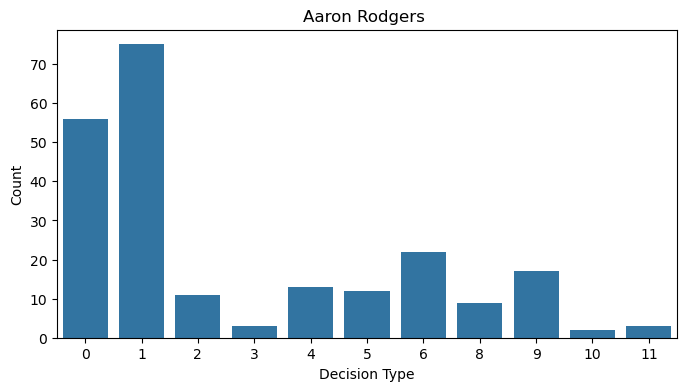

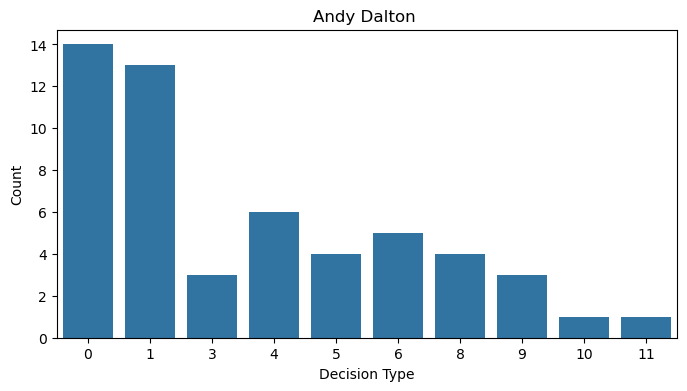

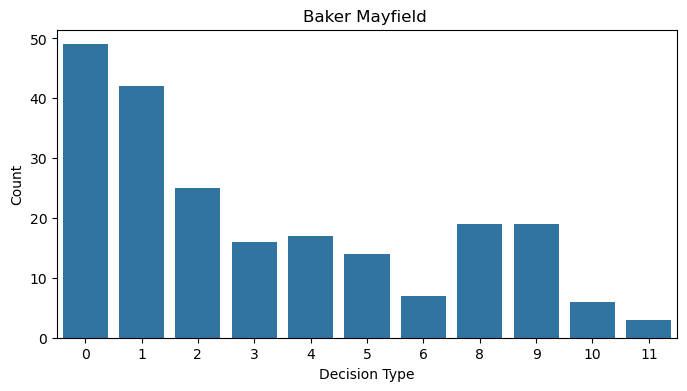

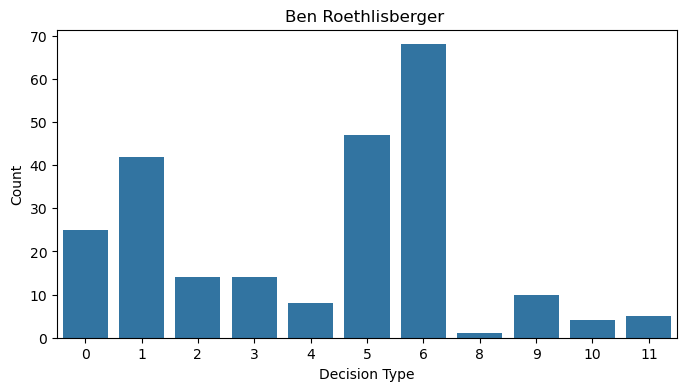

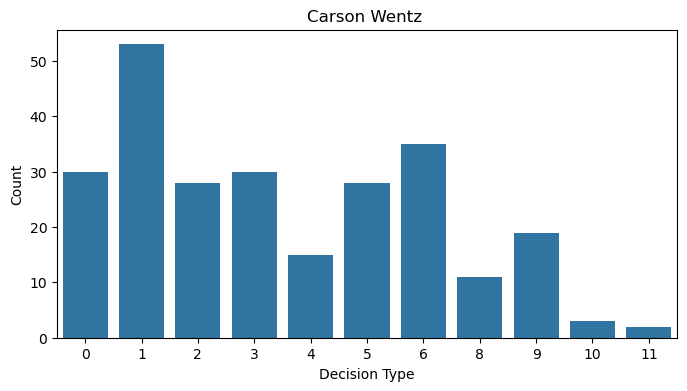

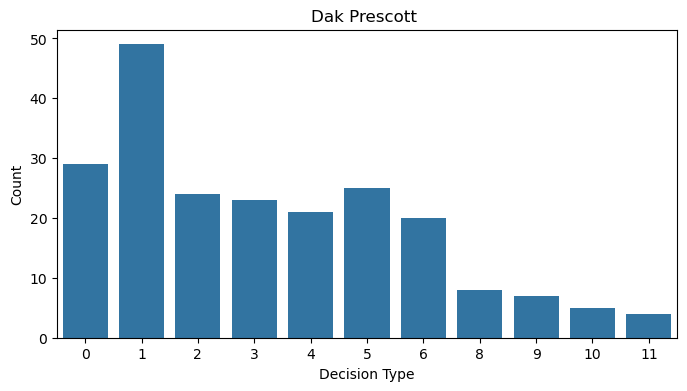

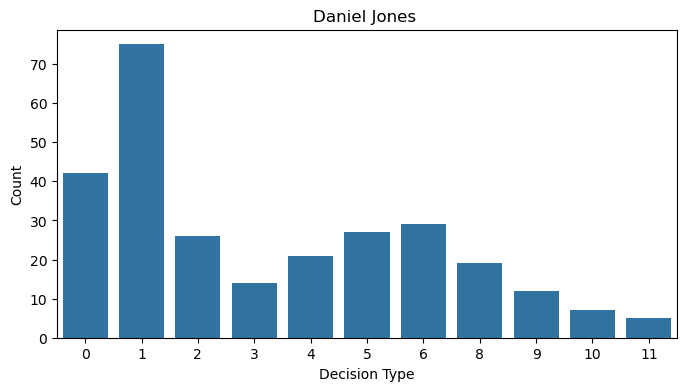

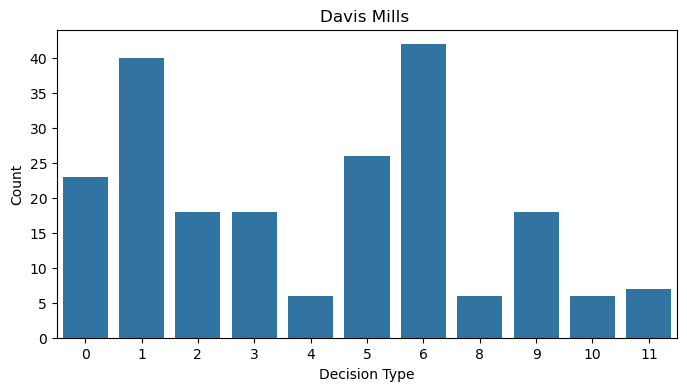

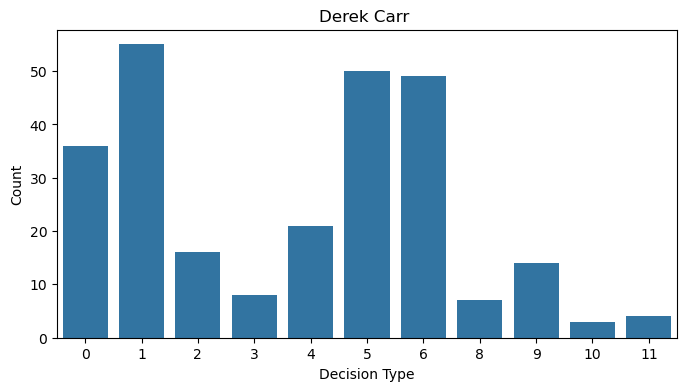

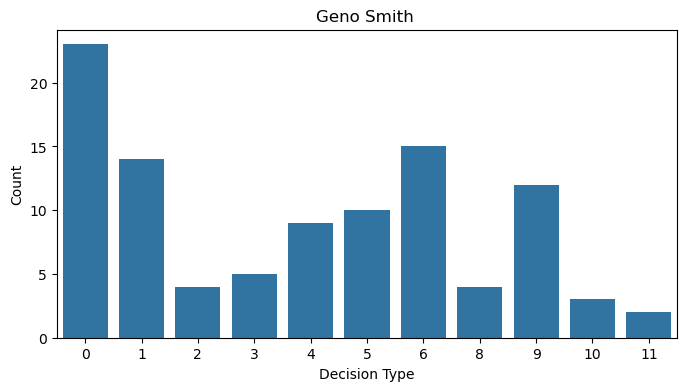

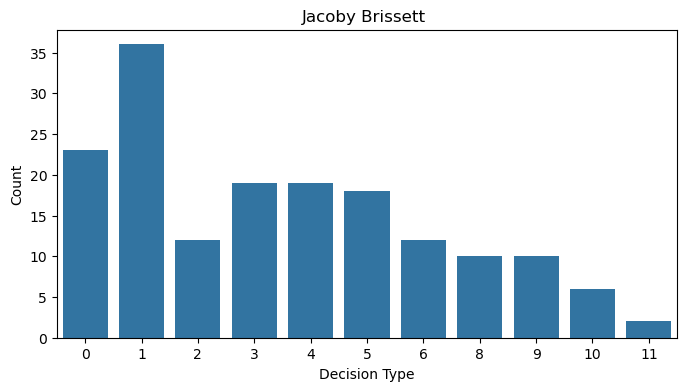

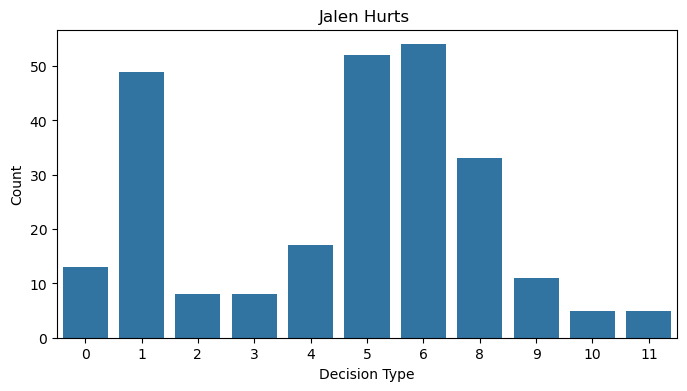

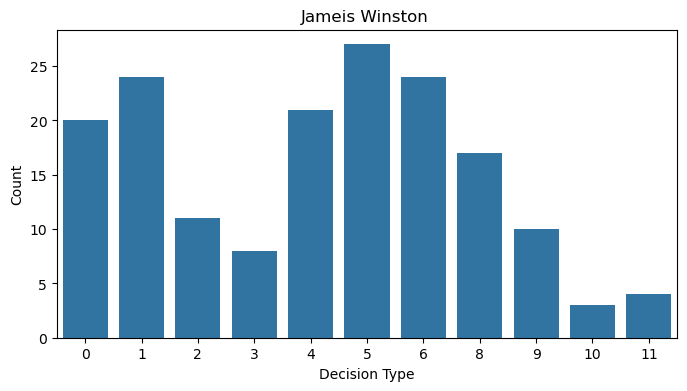

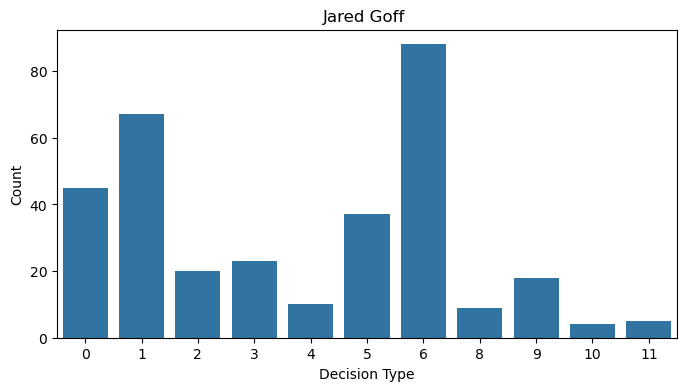

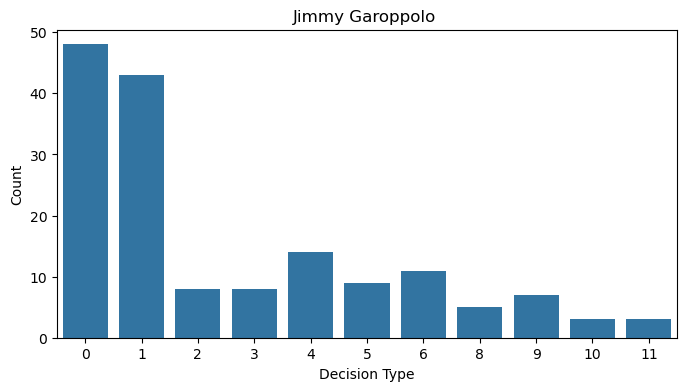

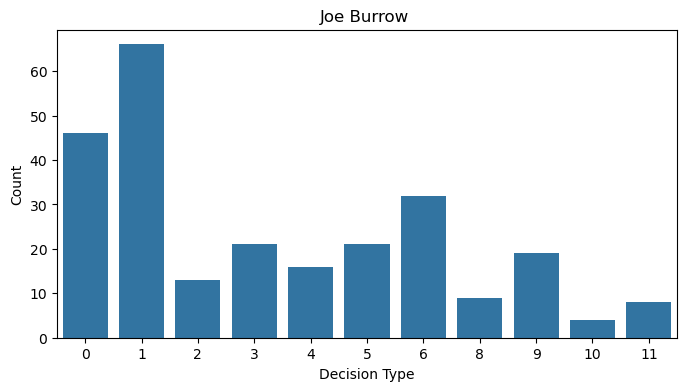

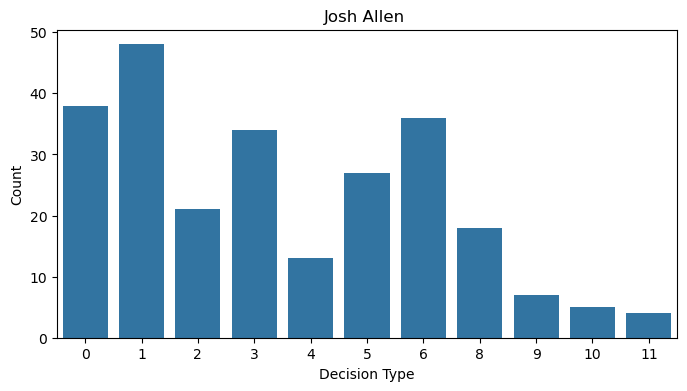

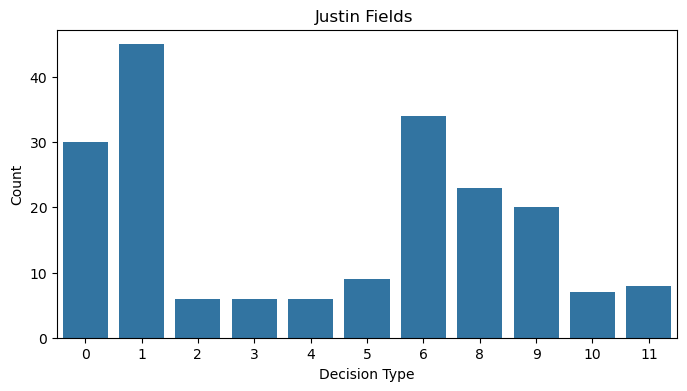

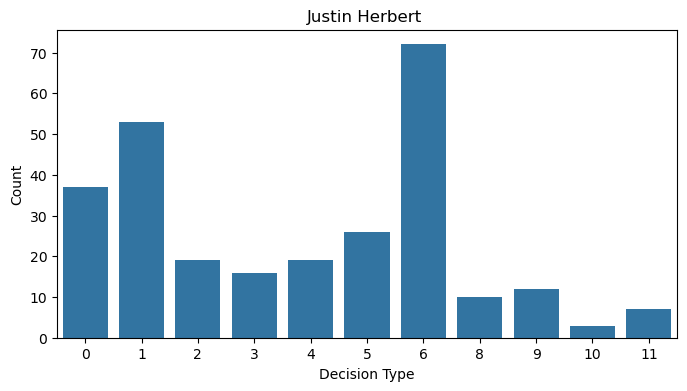

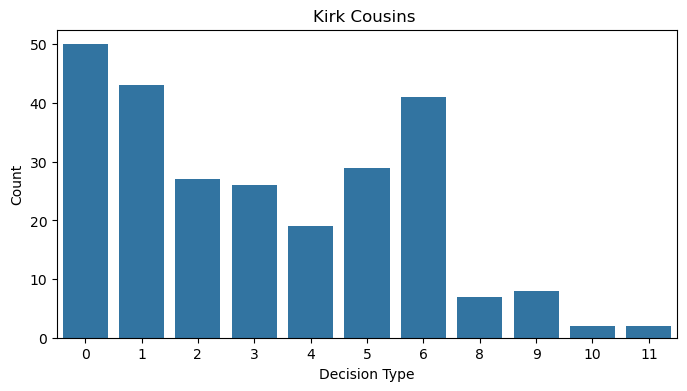

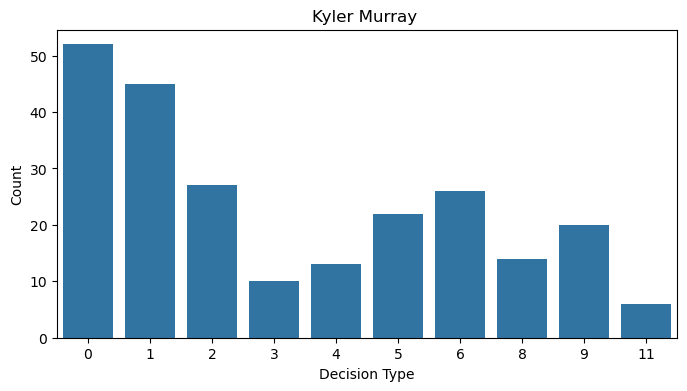

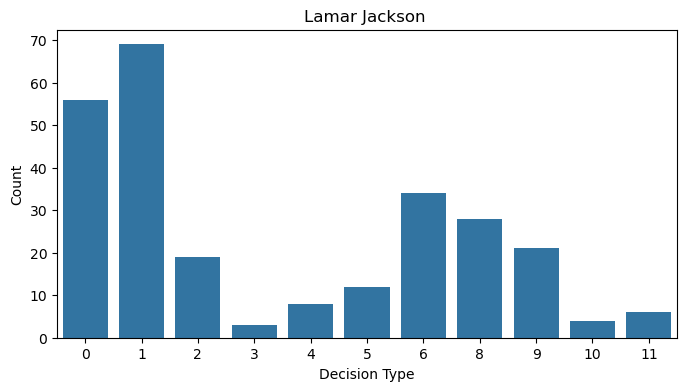

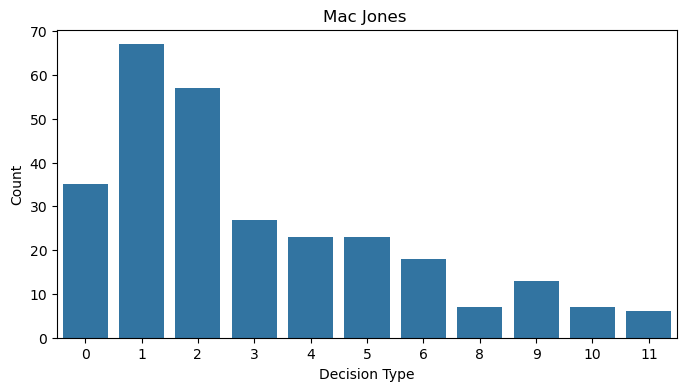

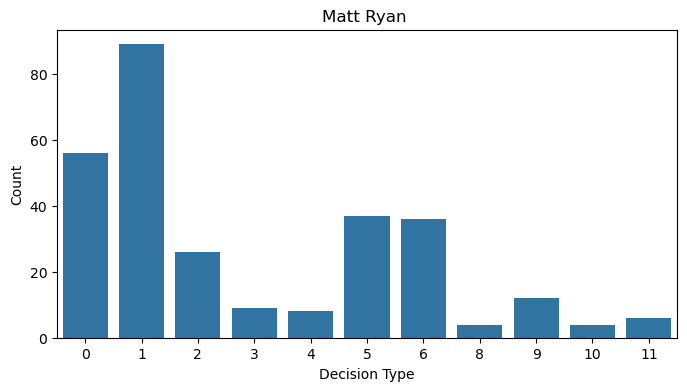

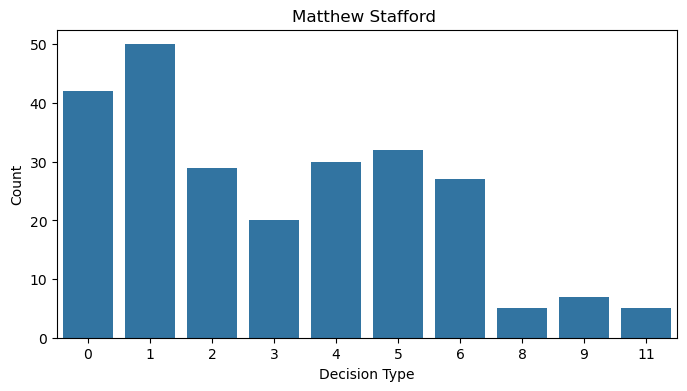

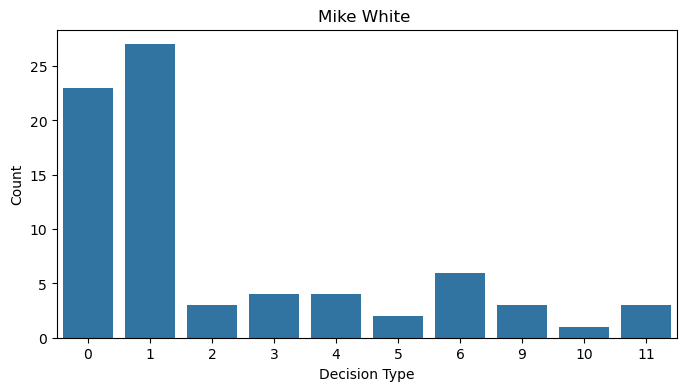

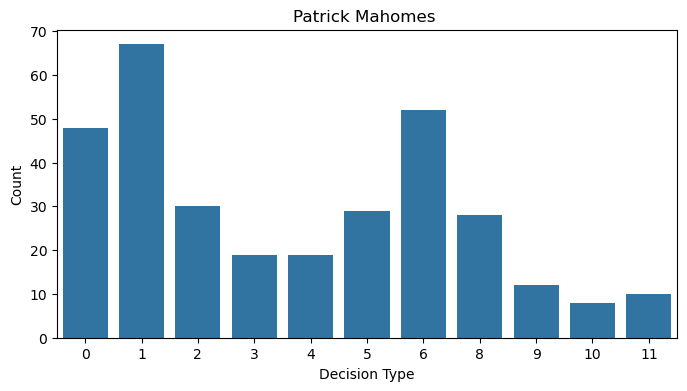

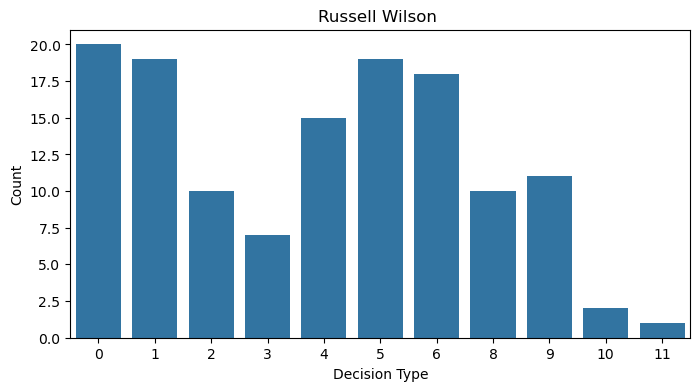

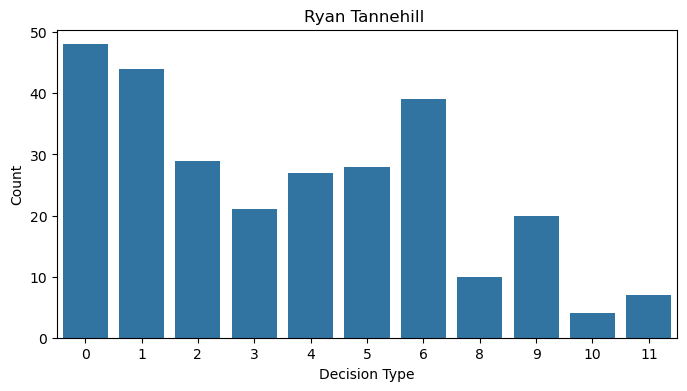

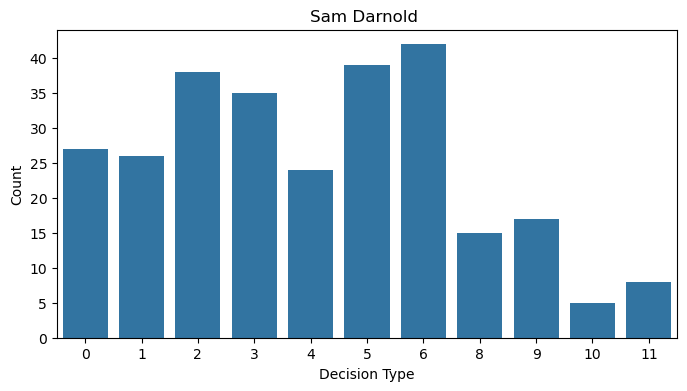

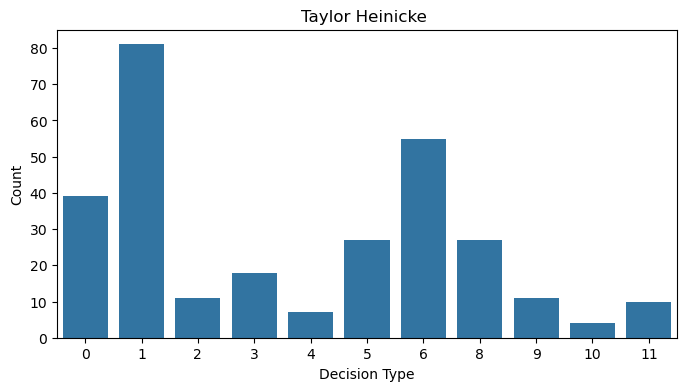

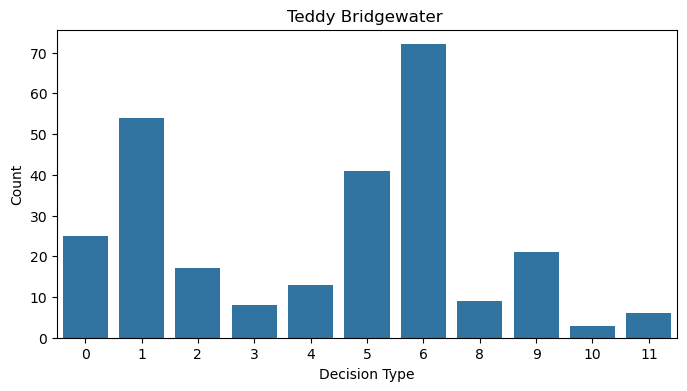

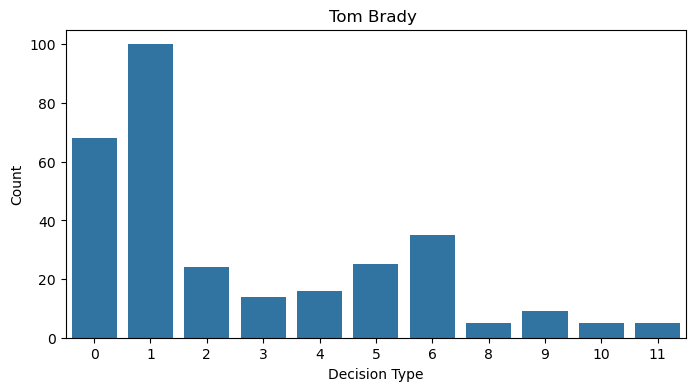

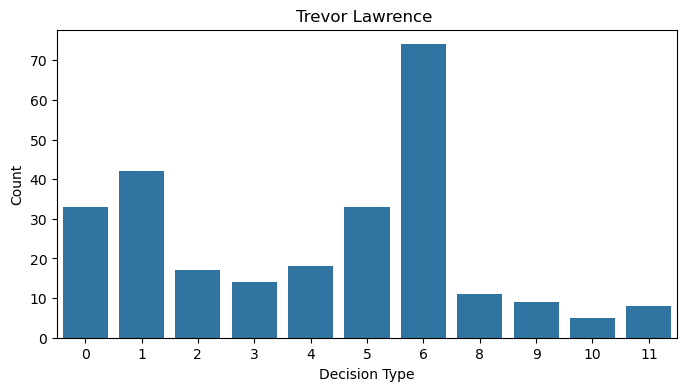

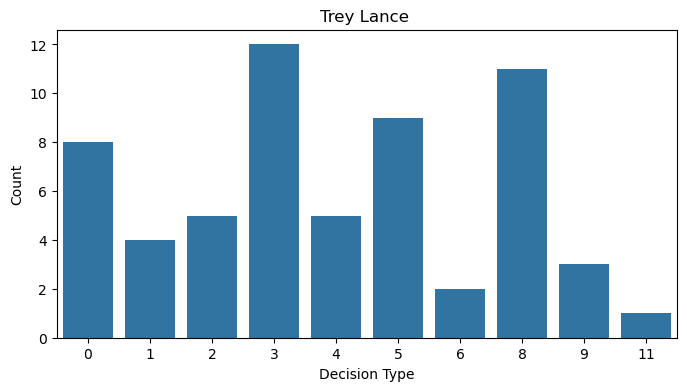

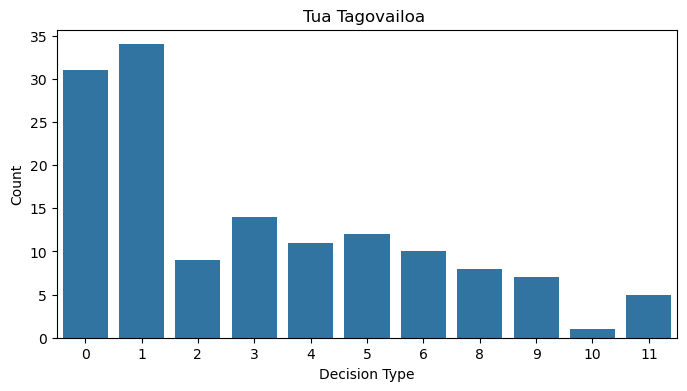

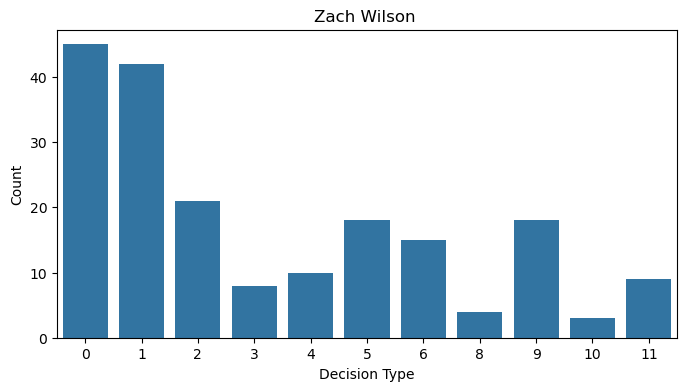

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import glob

players = pd.read_csv('players.csv')
plays = pd.read_csv('plays.csv')
games = pd.read_csv('games.csv')

tracks_list = []
for fname in sorted(glob.glob('week*.csv')):
    df = pd.read_csv(fname)
    tracks_list.append(df)
tracks = pd.concat(tracks_list, ignore_index=True)



players['nflId'] = players['nflId'].astype(str)
qb_df = players[players['officialPosition'] == 'QB'][['nflId', 'displayName']]
qb_ids = qb_df['nflId'].unique()
tracks = tracks[tracks['nflId'].notnull()].copy()
tracks['nflId'] = tracks['nflId'].astype(float).astype(int).astype(str)

print(qb_ids[:10])
print(tracks['nflId'].unique()[:10])
print(len(set(qb_ids) & set(tracks['nflId'].unique())))


tracks_qb = tracks[tracks['nflId'].isin(qb_ids)].copy()
print(len(tracks_qb))


pass_plays = plays[plays['passResult'].notnull()][['gameId','playId']].drop_duplicates()
print(len(pass_plays))


tracks_qb_pass = tracks_qb.merge(pass_plays, on=['gameId','playId'], how='inner')
print(len(tracks_qb_pass))


feature_cols = ['o', 'dir', 's', 'a']
tracks_qb_pass = tracks_qb_pass.dropna(subset=feature_cols)
print(len(tracks_qb_pass))

if len(tracks_qb_pass) == 0:
    print('wrong')
else:
    play_throw_type = tracks_qb_pass.groupby(['gameId','playId','nflId'])[feature_cols].first().reset_index()

    
    kmeans = KMeans(n_clusters=7, random_state=42)
    play_throw_type['throw_type'] = kmeans.fit_predict(play_throw_type[feature_cols])

    
    plays = plays.merge(play_throw_type[['gameId','playId','nflId','throw_type']], on=['gameId','playId'], how='left')
    plays = plays.merge(qb_df, on='nflId', how='left')

    
    plays['decision_type'] = None
    plays.loc[(plays['throw_type'].notnull()), 'decision_type'] = plays['throw_type']
    handoff_mask = plays['playDescription'].str.contains('handoff|left end|right end|up the middle', case=False, na=False)
    plays.loc[handoff_mask, 'decision_type'] = 7
    rush_mask = (plays['playDescription'].str.contains('scramble', case=False, na=False)) | (
        (plays['playDescription'].str.contains('rush', case=False, na=False)) & (plays['passResult'].isnull()))
    plays.loc[rush_mask, 'decision_type'] = 8
    sack_mask = plays['playDescription'].str.contains('sack', case=False, na=False)
    plays.loc[sack_mask, 'decision_type'] = 9
    fumble_mask = plays['playDescription'].str.contains('fumble', case=False, na=False)
    plays.loc[fumble_mask, 'decision_type'] = 10
    inter_mask = plays['playDescription'].str.contains('intercept', case=False, na=False)
    plays.loc[inter_mask, 'decision_type'] = 11
    plays['decision_type'] = plays['decision_type'].astype('Int64')

    stat = plays.groupby(['displayName', 'decision_type']).size().reset_index(name='count')
    print('\n【QB ALL COUNT】\n', stat.head(20))
    
qb_counts = stat.groupby('displayName')['count'].sum().reset_index()
threshold = 50  
qb_valid = qb_counts[qb_counts['count'] >= threshold]['displayName'].tolist()
print(f"样本数大于{threshold}的QB有：", qb_valid)

for qb in qb_valid:
    data = stat[stat['displayName'] == qb]
    plt.figure(figsize=(8, 4))
    sns.barplot(data=data, x='decision_type', y='count')
    plt.title(f'{qb} ')
    plt.xlabel('Decision Type')
    plt.ylabel('Count')
    plt.show()


In [ ]:
import pandas as pd
import glob
from sklearn.cluster import KMeans

# 1. 轨迹数据批量读取与id修正
tracks_list = []
for fname in sorted(glob.glob('week*.csv')):  # 修改为你的目录
    df = pd.read_csv(fname)
    df = df[df['nflId'].notnull()].copy()
    df['nflId'] = df['nflId'].astype(float).astype(int).astype(str)
    tracks_list.append(df)
tracks = pd.concat(tracks_list, ignore_index=True)
print('总轨迹行数:', len(tracks))

# 2. 基础数据读取
players = pd.read_csv('players.csv')
plays = pd.read_csv('plays.csv')

players['nflId'] = players['nflId'].astype(str)
qb_df = players[players['officialPosition'] == 'QB'][['nflId', 'displayName']]
qb_ids = qb_df['nflId'].unique()

# 3. QB轨迹筛选
tracks_qb = tracks[tracks['nflId'].isin(qb_ids)].copy()
print('QB轨迹行数:', len(tracks_qb))

# 4. 传球play筛选
pass_plays = plays[plays['passResult'].notnull()][['gameId', 'playId']].drop_duplicates()
tracks_qb_pass = tracks_qb.merge(pass_plays, on=['gameId', 'playId'], how='inner')
feature_cols = ['o', 'dir', 's', 'a']
tracks_qb_pass = tracks_qb_pass.dropna(subset=feature_cols)

if len(tracks_qb_pass) == 0:
    print('没有可用的QB传球轨迹，检查数据！')
    exit()
else:
    play_throw_type = tracks_qb_pass.groupby(['gameId', 'playId', 'nflId'])[feature_cols].first().reset_index()
    kmeans = KMeans(n_clusters=7, random_state=42)
    play_throw_type['throw_type'] = kmeans.fit_predict(play_throw_type[feature_cols])

# 5. 合并标签回plays
plays = plays.merge(play_throw_type[['gameId', 'playId', 'nflId', 'throw_type']], on=['gameId', 'playId'], how='left')
plays = plays.merge(qb_df, on='nflId', how='left')

# 6. 决策类型归类
plays['decision_type'] = None
plays.loc[(plays['throw_type'].notnull()), 'decision_type'] = plays['throw_type']
handoff_mask = plays['playDescription'].str.contains('handoff|left end|right end|up the middle', case=False, na=False)
plays.loc[handoff_mask, 'decision_type'] = 7
rush_mask = (plays['playDescription'].str.contains('scramble', case=False, na=False)) | (
    (plays['playDescription'].str.contains('rush', case=False, na=False)) & (plays['passResult'].isnull()))
plays.loc[rush_mask, 'decision_type'] = 8
sack_mask = plays['playDescription'].str.contains('sack', case=False, na=False)
plays.loc[sack_mask, 'decision_type'] = 9
fumble_mask = plays['playDescription'].str.contains('fumble', case=False, na=False)
plays.loc[fumble_mask, 'decision_type'] = 10
inter_mask = plays['playDescription'].str.contains('intercept', case=False, na=False)
plays.loc[inter_mask, 'decision_type'] = 11
plays['decision_type'] = plays['decision_type'].astype('Int64')

# 7. 加入压迫状态（如果有pffScoutingData.csv，可以自动合并）
try:
    pff = pd.read_csv('pffScoutingData.csv')
    pff['under_pressure'] = ((pff['pff_sack'] == 1) | (pff['pff_hurry'] == 1) | (pff['pff_hit'] == 1)).astype(int)
    plays = plays.merge(pff[['gameId', 'playId', 'under_pressure']], on=['gameId', 'playId'], how='left')
    plays['under_pressure'] = plays['under_pressure'].fillna(0).astype(int)
except Exception:
    # 若没有pff文件，则自动按playDescription关键字标注
    plays['under_pressure'] = plays['playDescription'].str.contains('pressure|sack|hurry|hit', case=False, na=False).astype(int)

# 8. 补充EPA（如没有epa字段则用playResult）
if 'epa' not in plays.columns:
    plays['epa'] = plays['playResult']

# 9. 统计比例与EPA
count_df = (
    plays.groupby(['displayName', 'under_pressure', 'decision_type'])
    .size().reset_index(name='count')
)
total_df = (
    plays.groupby(['displayName', 'under_pressure'])
    .size().reset_index(name='total')
)
merged_df = count_df.merge(total_df, on=['displayName', 'under_pressure'], how='left')
merged_df['proportion'] = merged_df['count'] / merged_df['total']
epa_df = (
    plays.groupby(['displayName', 'under_pressure', 'decision_type'])['epa']
    .mean().reset_index(name='epa_mean')
)
final_df = merged_df.merge(epa_df, on=['displayName', 'under_pressure', 'decision_type'], how='left')

# 10. 保存为csv
final_df.to_csv('final_df.csv', index=False)
print('final_df.csv 已保存，可用于交互式Dash仪表盘！')


总轨迹行数: 7952692
QB轨迹行数: 362883


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_33348\2431750077.py:47: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[(plays['throw_type'].notnull()), 'decision_type'] = plays['throw_type']


✅ final_df.csv 已保存，可用于交互式Dash仪表盘！


In [1]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd


final_df = pd.read_csv('final_df.csv')

qb_options = [{'label': qb, 'value': qb} for qb in sorted(final_df['displayName'].dropna().unique())]
pressure_options = [
    {'label': 'Not under pressure', 'value': 0},
    {'label': 'Under pressure', 'value': 1}
]

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Analysis of the interaction between NFL QB decision types and EPA"),
    html.Label("Choose the quarterback:"),
    dcc.Dropdown(id='qb_dropdown', options=qb_options, value=qb_options[0]['value']),
    html.Label("Select pressure state:"),
    dcc.Dropdown(id='pressure_dropdown', options=pressure_options, value=0),
    dcc.Graph(id='proportion_graph'),
    dcc.Graph(id='epa_graph')
])

@app.callback(
    [Output('proportion_graph', 'figure'),
     Output('epa_graph', 'figure')],
    [Input('qb_dropdown', 'value'),
     Input('pressure_dropdown', 'value')]
)
def update_graph(qb_name, under_pressure):
    data = final_df[(final_df['displayName'] == qb_name) & (final_df['under_pressure'] == under_pressure)]
    if data.empty:
        fig1 = px.bar(title="无数据")
        fig2 = px.bar(title="无数据")
    else:
        fig1 = px.bar(data, x='decision_type', y='proportion',
                      title=f"{qb_name} {'Under pressure' if under_pressure else 'Not under pressure'} the proportion of each decision type selected")
        fig2 = px.bar(data, x='decision_type', y='epa_mean',
                      title=f"{qb_name} {'Under pressure' if under_pressure else 'Not under pressure'} the average value of EPA for each decision type")
    return fig1, fig2

if __name__ == '__main__':
    app.run(debug=True)



In [4]:
tracks_qb_pass_type = tracks_qb_pass.merge(
    play_throw_type[['gameId', 'playId', 'throw_type']],
    on=['gameId', 'playId'], how='inner'
)


In [5]:
print(tracks_qb_pass_type.columns)
print(tracks_qb_pass_type.head())


Index(['gameId', 'playId', 'nflId', 'frameId', 'time', 'jerseyNumber', 'team',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'throw_type'],
      dtype='object')
       gameId  playId  nflId  frameId                     time  jerseyNumber  \
0  2021090900      97  25511        1  2021-09-10T00:26:31.100          12.0   
1  2021090900      97  25511        2  2021-09-10T00:26:31.200          12.0   
2  2021090900      97  25511        3  2021-09-10T00:26:31.300          12.0   
3  2021090900      97  25511        4  2021-09-10T00:26:31.400          12.0   
4  2021090900      97  25511        5  2021-09-10T00:26:31.500          12.0   

  team playDirection      x      y     s     a   dis       o     dir event  \
0   TB         right  37.77  24.22  0.29  0.30  0.03  165.16   84.99  None   
1   TB         right  37.78  24.22  0.23  0.11  0.02  164.33   92.87  None   
2   TB         right  37.78  24.24  0.16  0.10  0.01  160.24   68.55  None   
3   TB      

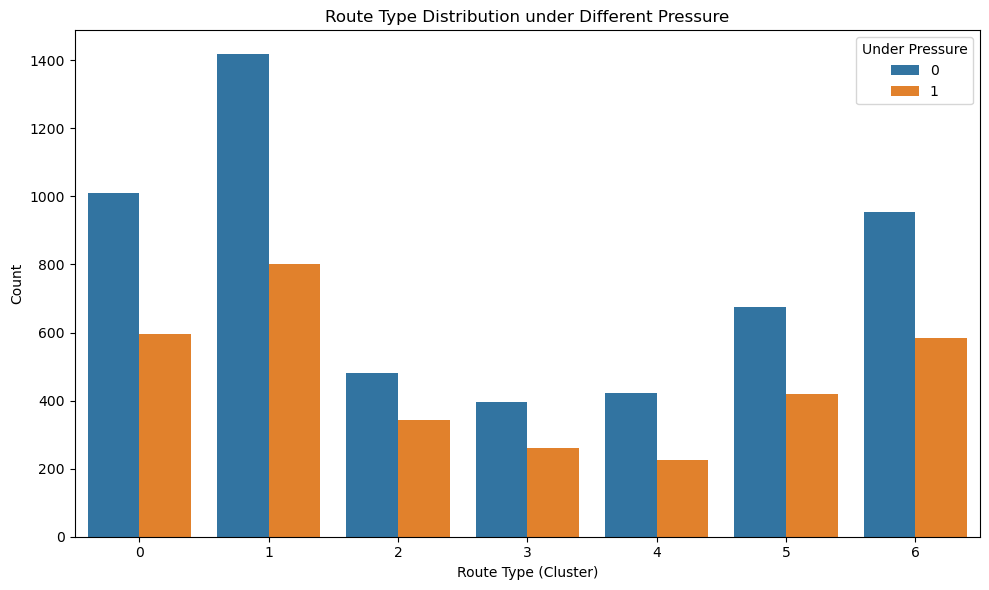

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns



if 'under_pressure' not in plays.columns:
    print('请先将 under_pressure 标注到plays表')
    

else:
    df_stat = plays.groupby(['throw_type', 'under_pressure']).size().reset_index(name='count')
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_stat, x='throw_type', y='count', hue='under_pressure')
    plt.title('Route Type Distribution under Different Pressure')
    plt.xlabel('Route Type (Cluster)')
    plt.ylabel('Count')
    plt.legend(title='Under Pressure')
    plt.tight_layout()
    plt.show()


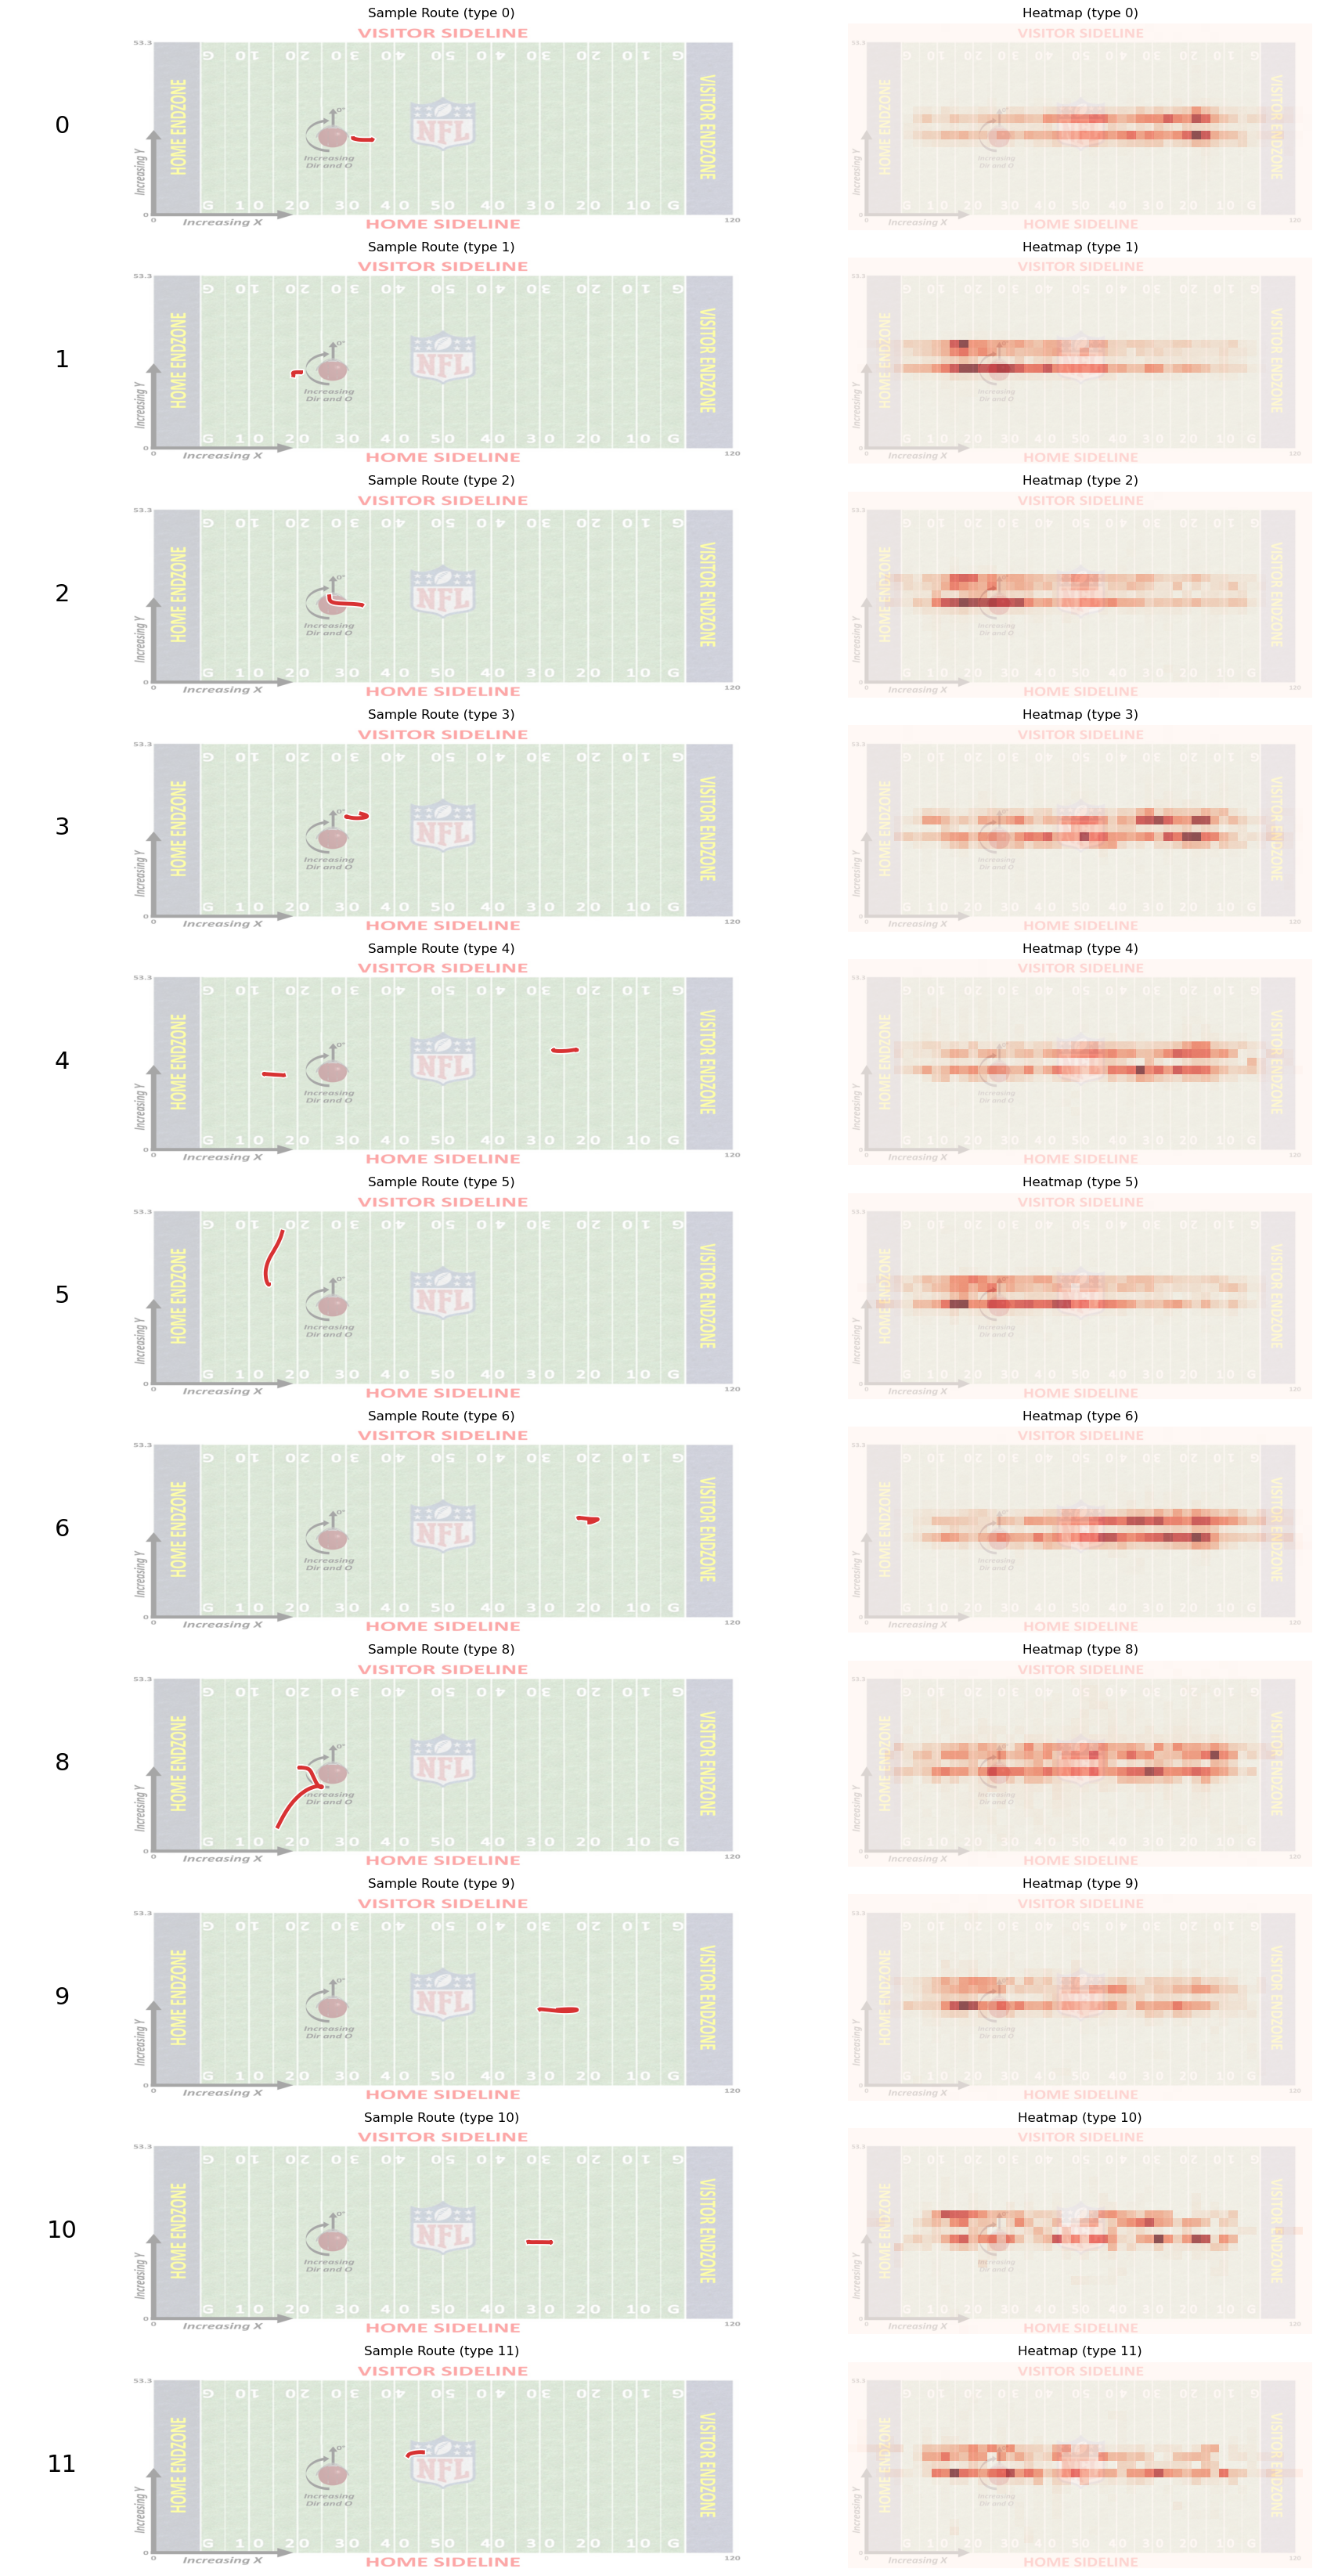

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patheffects as pe
import numpy as np
import random

# —— 可复现的随机样例 —— 
random.seed(42)

# 合并 decision_type 到轨迹数据
df_clustered = tracks_qb_pass.merge(
    plays[['gameId', 'playId', 'nflId', 'decision_type']],
    on=['gameId', 'playId', 'nflId'],
    how='left'
).dropna(subset=['decision_type']).copy()
df_clustered['decision_type'] = df_clustered['decision_type'].astype(int)

clusters = sorted(df_clustered['decision_type'].unique())
n_clusters = len(clusters)

# 球场背景
field_img = mpimg.imread('field.png')

# 画布（第一列更窄）
fig, axes = plt.subplots(
    n_clusters, 3,
    figsize=(18, 3 * n_clusters),
    gridspec_kw={'width_ratios': [0.45, 2.6, 2.6]}
)
if n_clusters == 1:
    axes = np.expand_dims(axes, 0)

for idx, cluster in enumerate(clusters):
    df_c = df_clustered[df_clustered['decision_type'] == cluster].copy()

    # —— 第一列：只显示编号，完全透明背景 —— 
    ax_id = axes[idx, 0]
    ax_id.text(0.5, 0.5, str(cluster), fontsize=22, ha='center', va='center')
    ax_id.set_axis_off()
    ax_id.set_facecolor('none')     # 透明
    ax_id.patch.set_alpha(0.0)

    # —— 第二列：Sample Route（加粗 + 白色描边，让路线更醒目；QB 额外高亮）——
    ax_rt = axes[idx, 1]
    sample_play_id = random.choice(df_c['playId'].unique())
    df_sample = df_c[df_c['playId'] == sample_play_id].sort_values('frameId')

    # 草坪调低透明度，突出路线
    ax_rt.imshow(field_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.35)

    # 绘制每名球员的轨迹；QB 用更粗的线
    for pid in df_sample['nflId'].unique():
        player_track = df_sample[df_sample['nflId'] == pid].sort_values('frameId')
        is_qb = str(pid) in set(qb_ids)  # qb_ids 已在你前文代码中生成（字符串）
        lw = 3.5 if is_qb else 2.6
        color = 'tab:red' if is_qb else 'tab:blue'
        line, = ax_rt.plot(
            player_track['x'].values, player_track['y'].values,
            color=color, linewidth=lw, alpha=0.95, zorder=3
        )
        # 白色外描边（glow）进一步提升对比度
        line.set_path_effects([
            pe.Stroke(linewidth=lw + 2.5, foreground='white', alpha=0.9),
            pe.Normal()
        ])

    ax_rt.set_title(f"Sample Route (type {cluster})", fontsize=12)
    ax_rt.set_xlim(0, 120); ax_rt.set_ylim(0, 53.3)
    ax_rt.axis('off')

    # —— 第三列：热力图（保持草坪，但路线不画）——
    ax_hm = axes[idx, 2]
    heatmap_data, xedges, yedges = np.histogram2d(
        df_c['x'], df_c['y'],
        bins=(50, 25), range=[[0, 120], [0, 53.3]]
    )
    ax_hm.imshow(field_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.4)
    ax_hm.imshow(
        np.rot90(heatmap_data),
        cmap='Reds', alpha=0.65, extent=[0, 120, 0, 53.3], zorder=2
    )
    ax_hm.set_title(f"Heatmap (type {cluster})", fontsize=12)
    ax_hm.set_xlim(0, 120); ax_hm.set_ylim(0, 53.3)
    ax_hm.axis('off')

plt.tight_layout()
plt.show()





C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_18932\950753880.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


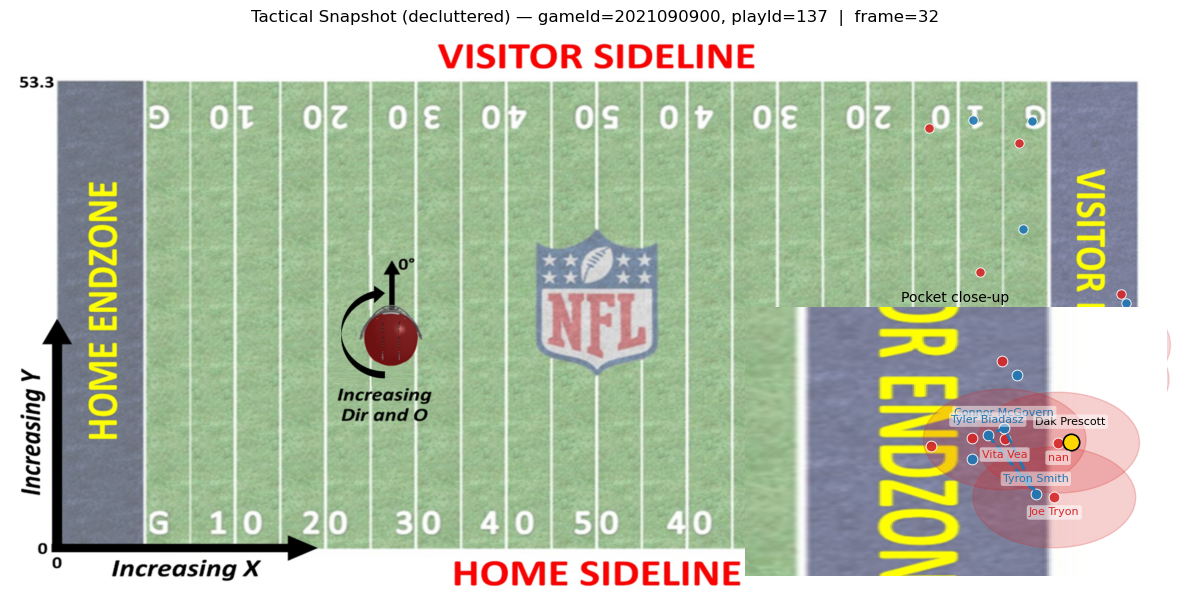

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.spatial import ConvexHull
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gid, pid = 2021090900, 137  
players = pd.read_csv('players.csv')
plays   = pd.read_csv('plays.csv')
tracks  = pd.read_csv('week1.csv')   

players['nflId'] = players['nflId'].astype(str)
tracks['nflId']  = tracks['nflId'].astype('Int64').astype(str)
df_play = tracks[(tracks['gameId']==gid) & (tracks['playId']==pid)].merge(
    players[['nflId','displayName','officialPosition']], on='nflId', how='left'
)

pass_events     = ['pass_forward','autoevent_passforward']
fallback_events = ['pass_arrived','qb_sack','qb_strip_sack','pass_outcome_caught','pass_outcome_incomplete']

cand = df_play[df_play['event'].isin(pass_events)]['frameId'].unique()
if len(cand)>0:
    throw_frame = int(cand[0])
else:
    fb = df_play[df_play['event'].isin(fallback_events)]['frameId'].unique()
    throw_frame = int(fb[0]) if len(fb)>0 else int(df_play['frameId'].max())

df_throw = df_play[df_play['frameId']==throw_frame].copy()

qb_df = df_throw[df_throw['officialPosition']=='QB']
if qb_df.empty:
    qb_ids_all = players[players['officialPosition']=='QB']['nflId'].unique()
    qb_df = df_throw[df_throw['nflId'].isin(qb_ids_all)]
if qb_df.empty:
    raise ValueError(f'{gid}-{pid} 该帧找不到QB')

qb_x, qb_y = qb_df.iloc[0][['x','y']]
qb_team    = qb_df.iloc[0]['team']  # 'home' 或 'away'


df_throw['side'] = np.where(df_throw['team']==qb_team, 'Offense', 'Defense')
df_throw['dist_to_qb'] = np.hypot(df_throw['x']-qb_x, df_throw['y']-qb_y)

offense = df_throw[df_throw['side']=='Offense']
defense = df_throw[df_throw['side']=='Defense']


closest_def = defense.nsmallest(3, 'dist_to_qb')

if 'position' in df_throw.columns:
    ol_mask = offense['position'].isin(['LT','LG','C','RG','RT'])
else:
    ol_mask = False

if isinstance(ol_mask, pd.Series) and ol_mask.any():
    ol_near = offense[ol_mask].nsmallest(3, 'dist_to_qb')
else:
    ol_near = offense[offense['officialPosition']!='QB'].nsmallest(3, 'dist_to_qb')


if isinstance(ol_mask, pd.Series) and ol_mask.sum()>=3:
    ol_points = offense[ol_mask][['x','y']].values
elif len(ol_near)>=3:
    ol_points = ol_near[['x','y']].values
else:
    ol_points = None


field_img = mpimg.imread('field.png')
fig, ax = plt.subplots(figsize=(12, 6.1))
ax.imshow(field_img, extent=[0, 120, 0, 53.3], aspect='auto')


ax.scatter(offense['x'], offense['y'], s=46, color='tab:blue',  alpha=0.9, label='Offense', edgecolors='white', linewidths=0.7, zorder=2)
ax.scatter(defense['x'], defense['y'], s=46, color='tab:red',    alpha=0.9, label='Defense', edgecolors='white', linewidths=0.7, zorder=2)
ax.scatter([qb_x], [qb_y],           s=120, color='gold',        alpha=1.0, label='QB',      edgecolors='black', linewidths=1.2, zorder=3)


def draw_hull(ax_, pts, color='tab:blue', alpha=0.18, lw=2, ls='--'):
    if pts is None or len(pts)<3: return
    hull = ConvexHull(pts)
    poly = pts[hull.vertices]
    poly = np.vstack([poly, poly[0]]) 
    ax_.fill(poly[:,0], poly[:,1], color=color, alpha=alpha, zorder=1)
    ax_.plot(poly[:,0], poly[:,1], color=color, lw=lw, ls=ls, zorder=2)

draw_hull(ax, ol_points, color='tab:blue', alpha=0.15)

for _, r in closest_def.iterrows():
    circ = plt.Circle((r['x'], r['y']), 3, color='tab:red', alpha=0.18, zorder=1)
    ax.add_patch(circ)

ax.set_xlim(0, 120); ax.set_ylim(0, 53.3); ax.axis('off')
ax.set_title(f"Tactical Snapshot (decluttered) — gameId={gid}, playId={pid}  |  frame={throw_frame}")


w_x, w_y = 12, 8  
xmin, xmax = max(0, qb_x-w_x), min(120, qb_x+w_x)
ymin, ymax = max(0, qb_y-w_y), min(53.3, qb_y+w_y)


axins = inset_axes(ax, width="36%", height="48%", loc='lower right', borderpad=1.0)
axins.imshow(field_img, extent=[0, 120, 0, 53.3], aspect='auto')
axins.set_xlim(xmin, xmax); axins.set_ylim(ymin, ymax); axins.axis('off')
axins.set_title("Pocket close-up", fontsize=10, pad=4)


axins.scatter(offense['x'], offense['y'], s=60, color='tab:blue', alpha=0.9, edgecolors='white', linewidths=0.7, zorder=2)
axins.scatter(defense['x'], defense['y'], s=60, color='tab:red',   alpha=0.9, edgecolors='white', linewidths=0.7, zorder=2)
axins.scatter([qb_x], [qb_y], s=140, color='gold', edgecolors='black', linewidths=1.2, zorder=3)


draw_hull(axins, ol_points, color='tab:blue', alpha=0.18)
for _, r in closest_def.iterrows():
    axins.add_patch(plt.Circle((r['x'], r['y']), 3, color='tab:red', alpha=0.22, zorder=1))


def annotate(ax_, row, color, dy=0.8):
    ax_.text(row['x'], row['y']+dy, str(row.get('displayName', '')),
             fontsize=8, ha='center', va='center', color=color,
             path_effects=[], zorder=4,
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2'))

annotate(axins, qb_df.iloc[0], color='black', dy=1.2)


for _, r in closest_def.iterrows():
    axins.text(r['x'], r['y']-0.9, str(r.get('displayName','')),
               fontsize=8, ha='center', va='center', color='tab:red',
               bbox=dict(facecolor='white', alpha=0.55, edgecolor='none', boxstyle='round,pad=0.2'), zorder=4)


for _, r in ol_near.iterrows():
    annotate(axins, r, color='tab:blue', dy=0.9)

plt.tight_layout()
plt.show()




In [33]:
# =========================================================
# 对齐并合并 epa
# 依赖: pip install nfl_data_py
# 输入: games.csv, plays.csv
# 输出: plays_with_epa.csv (新增列: game_id, epa)
# =========================================================
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import re

# ---------- 读取本地 ----------
games = pd.read_csv('games.csv')   # ['gameId','season','week','homeTeamAbbr','visitorTeamAbbr',...]
plays = pd.read_csv('plays.csv')   # 至少包含 ['gameId','playId','quarter','gameClock','down','yardsToGo','possessionTeam','playDescription', ...]

# 类型统一
games['season'] = pd.to_numeric(games['season'], errors='coerce').astype('Int64')
games['week']   = pd.to_numeric(games['week'],   errors='coerce').astype('Int64')
plays['gameId'] = plays['gameId'].astype(str)
plays['playId'] = pd.to_numeric(plays['playId'], errors='coerce').astype('Int64')

# 赛季集合（通常是单赛季）
seasons = sorted(games['season'].dropna().unique().tolist())
print("准备对齐赛季:", seasons)

# ---------- 拉 schedule 并建立 game_id 映射 ----------
sched = nfl.import_schedules(seasons)
sched = sched[['season','week','home_team','away_team','game_id']].copy()
sched.rename(columns={'home_team':'homeTeamAbbr','away_team':'visitorTeamAbbr'}, inplace=True)

# 常见缩写差异修正（按需增补）
team_fix = {'JAC':'JAX','WSH':'WAS','LAR':'LA'}  # 你的 games 里是 LA/…，fastR 是 LAR/…
for col in ['homeTeamAbbr','visitorTeamAbbr']:
    sched[col] = sched[col].replace(team_fix)
    if col in games.columns:
        games[col] = games[col].replace(team_fix)

# 用 (season, week, home, away) 作为键
key_cols = ['season','week','homeTeamAbbr','visitorTeamAbbr']
games_key = games[['gameId'] + key_cols].drop_duplicates()
sched_key = sched[key_cols + ['game_id']].drop_duplicates()

map_df = games_key.merge(sched_key, on=key_cols, how='left')
map_df['gameId'] = map_df['gameId'].astype(str)
print(f"匹配到 fastR game_id 的比赛数: {map_df['game_id'].notna().sum()} / {len(map_df)}")
if map_df['game_id'].isna().any():
    print("未匹配示例：\n", map_df[map_df['game_id'].isna()].head())

# 合并 game_id 到 plays
plays = plays.merge(map_df[['gameId','game_id']], on='gameId', how='left')
plays['game_id'] = plays['game_id'].astype(str)

# ---------- 拉 PBP 并先按 (game_id, playId) 对齐 ----------
pbp_all = nfl.import_pbp_data(seasons)

# 统一关键列名 / 构造缺失列
pbp = pbp_all.copy()

# 1) game_id / play_id
if 'game_id' not in pbp.columns:
    raise ValueError("pbp 缺少 game_id 列")
if 'play_id' not in pbp.columns:
    # 某些老文件叫 playId；这里尽力兼容
    if 'playId' in pbp.columns:
        pbp.rename(columns={'playId':'play_id'}, inplace=True)
    else:
        raise ValueError("pbp 缺少 play_id 列")

pbp['game_id'] = pbp['game_id'].astype(str)
pbp['play_id'] = pd.to_numeric(pbp['play_id'], errors='coerce').astype('Int64')

# 2) quarter 列
if 'qtr' in pbp.columns:
    pbp['quarter_norm'] = pd.to_numeric(pbp['qtr'], errors='coerce').astype('Int64')
elif 'quarter' in pbp.columns:
    pbp['quarter_norm'] = pd.to_numeric(pbp['quarter'], errors='coerce').astype('Int64')
else:
    pbp['quarter_norm'] = pd.NA  # 兜底

# 3) clock 列：优先用 clock / game_clock；否则从 quarter_seconds_remaining 重建
def sec_to_mmss(sec):
    if pd.isna(sec):
        return np.nan
    try:
        sec = int(sec)
    except:
        return np.nan
    m, s = divmod(max(sec, 0), 60)
    return f"{m:02d}:{s:02d}"

if 'clock' in pbp.columns:
    pbp['clock_norm'] = pbp['clock'].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]
elif 'game_clock' in pbp.columns:
    pbp['clock_norm'] = pbp['game_clock'].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]
elif 'quarter_seconds_remaining' in pbp.columns:
    pbp['clock_norm'] = pbp['quarter_seconds_remaining'].apply(sec_to_mmss)
else:
    pbp['clock_norm'] = np.nan  # 实在没有就放空（兜底匹配会弱一些）

# 4) 其他键列
pbp['down_norm']    = pd.to_numeric(pbp.get('down', np.nan), errors='coerce').astype('Int64')
pbp['ytg_norm']     = pd.to_numeric(pbp.get('ydstogo', np.nan), errors='coerce').astype('Int64')
pbp['posteam_norm'] = pbp.get('posteam', pd.Series(index=pbp.index, dtype=object)).astype(str)

# 5) 只保留我们需要的列
keep_cols = ['game_id','play_id','quarter_norm','clock_norm','down_norm','ytg_norm','posteam_norm','epa']
if 'desc' in pbp.columns:
    keep_cols.append('desc')
pbp = pbp[keep_cols].copy()

# 6) 先尝试按 (game_id, playId) 直接合并
plays1 = plays.merge(pbp[['game_id','play_id','epa']], 
                     left_on=['game_id','playId'], right_on=['game_id','play_id'], how='left') \
              .drop(columns=['play_id'])
print("直接按 (game_id, playId) 合并到 epa 的数量：", plays1['epa'].notna().sum(), "/", len(plays1))

# 7) 二次兜底（按 quarter/clock/down/ydstogo/posteam）
import re
def norm_clock_mmss(s):
    if pd.isna(s): return np.nan
    s = str(s).strip()
    m = re.search(r'(\d{1,2}):(\d{2})', s)
    if m: return f"{int(m.group(1)):02d}:{int(m.group(2)):02d}"
    return np.nan

plays_keys = plays1.copy()
plays_keys['quarter_norm'] = pd.to_numeric(plays_keys.get('quarter', np.nan), errors='coerce').astype('Int64')
plays_keys['clock_norm']   = plays_keys.get('gameClock', '').apply(norm_clock_mmss)
plays_keys['down_norm']    = pd.to_numeric(plays_keys.get('down', np.nan), errors='coerce').astype('Int64')
plays_keys['ytg_norm']     = pd.to_numeric(plays_keys.get('yardsToGo', np.nan), errors='coerce').astype('Int64')
plays_keys['posteam_norm'] = plays_keys.get('possessionTeam', '').astype(str)

need_fill = plays_keys['epa'].isna() & plays_keys['game_id'].notna()
plays_fill = plays_keys[need_fill].copy()

if len(plays_fill) > 0:
    pbp_fill = pbp[['game_id','quarter_norm','clock_norm','down_norm','ytg_norm','posteam_norm','epa']].drop_duplicates()
    plays_fill2 = plays_fill.merge(
        pbp_fill,
        on=['game_id','quarter_norm','clock_norm','down_norm','ytg_norm','posteam_norm'],
        how='left',
        suffixes=('','_pbpkey')
    )
    print("兜底匹配成功数量：", plays_fill2['epa'].notna().sum(), "/", len(plays_fill2))
    idx = plays_fill2['epa'].notna()
    plays_keys.loc[plays_fill2[idx].index, 'epa'] = plays_fill2.loc[idx, 'epa'].values
else:
    print("没有需要兜底匹配的样本。")

# 最终结果在 plays_keys 里（含 epa）
out = plays_keys
out.to_csv('plays_with_epa.csv', index=False)
print("✅ 已保存：plays_with_epa.csv")
print("最终 epa 缺失率：", out['epa'].isna().mean())


准备对齐赛季: [2021]
匹配到 fastR game_id 的比赛数: 122 / 122
2021 done.
Downcasting floats.
直接按 (game_id, playId) 合并到 epa 的数量： 8557 / 8557
没有需要兜底匹配的样本。
✅ 已保存：plays_with_epa.csv
最终 epa 缺失率： 0.0


In [35]:
# =========================================================
# 对齐校验脚本（健壮版）：随机抽样，核对文本（playDescription vs desc）
# 依赖: nfl_data_py, pandas, numpy
# 输入: plays_with_epa.csv（来自①），nfl_data_py 的 pbp
# =========================================================
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import random
from difflib import SequenceMatcher
import re

def norm_clock_mmss(s):
    if pd.isna(s): return np.nan
    s = str(s).strip()
    m = re.search(r'(\d{1,2}):(\d{2})', s)
    if m: return f"{int(m.group(1)):02d}:{int(m.group(2)):02d}"
    return np.nan

def sec_to_mmss(sec):
    if pd.isna(sec): return np.nan
    try:
        sec = int(sec)
    except:
        return np.nan
    m, s = divmod(max(sec, 0), 60)
    return f"{m:02d}:{s:02d}"

def sim(a, b):
    if pd.isna(a) or pd.isna(b): return 0.0
    return SequenceMatcher(None, str(a), str(b)).ratio()

# 读入已经合并过 game_id 的版本
plays = pd.read_csv('plays_with_epa.csv')
plays['game_id'] = plays['game_id'].astype(str)
plays['playId']  = pd.to_numeric(plays['playId'], errors='coerce').astype('Int64')

# 赛季（从文件推断，不存在就默认 2021）
if 'season' in plays.columns:
    seasons = sorted(pd.to_numeric(plays['season'], errors='coerce').dropna().unique().tolist())
else:
    seasons = [2021]

pbp_all = nfl.import_pbp_data(seasons)
pbp_all['game_id'] = pbp_all['game_id'].astype(str)
if 'play_id' not in pbp_all.columns and 'playId' in pbp_all.columns:
    pbp_all.rename(columns={'playId':'play_id'}, inplace=True)
pbp_all['play_id'] = pd.to_numeric(pbp_all['play_id'], errors='coerce').astype('Int64')

# --- 健壮版 quarter/clock 归一 ---
pbp = pbp_all.copy()
# quarter
if 'qtr' in pbp.columns:
    pbp['quarter_norm'] = pd.to_numeric(pbp['qtr'], errors='coerce').astype('Int64')
elif 'quarter' in pbp.columns:
    pbp['quarter_norm'] = pd.to_numeric(pbp['quarter'], errors='coerce').astype('Int64')
else:
    pbp['quarter_norm'] = pd.NA

# clock: 优先 clock / game_clock；否则 quarter_seconds_remaining → mm:ss
if 'clock' in pbp.columns:
    pbp['clock_norm'] = pbp['clock'].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]
elif 'game_clock' in pbp.columns:
    pbp['clock_norm'] = pbp['game_clock'].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]
elif 'quarter_seconds_remaining' in pbp.columns:
    pbp['clock_norm'] = pbp['quarter_seconds_remaining'].apply(sec_to_mmss)
else:
    pbp['clock_norm'] = np.nan

pbp['down_norm']    = pd.to_numeric(pbp.get('down', np.nan), errors='coerce').astype('Int64')
pbp['ytg_norm']     = pd.to_numeric(pbp.get('ydstogo', np.nan), errors='coerce').astype('Int64')
pbp['posteam_norm'] = pbp.get('posteam', pd.Series(index=pbp.index, dtype=object)).astype(str)

keep_cols = ['game_id','play_id','quarter_norm','clock_norm','down_norm','ytg_norm','posteam_norm']
if 'desc' in pbp.columns: keep_cols.append('desc')
pbp = pbp[keep_cols].copy()

# 从有 game_id 的比赛里随机抽 3 场
games_ok = plays[plays['game_id'].notna()]['gameId'].astype(str).unique().tolist()
games_pick = random.sample(games_ok, min(3, len(games_ok)))
print("抽样比赛：", games_pick)

for gid in games_pick:
    fast_game_id = plays.loc[plays['gameId'].astype(str)==gid, 'game_id'].iloc[0]
    sub_plays = plays[plays['gameId'].astype(str)==gid].copy()

    # 直接 (game_id, playId) 连接
    chk = sub_plays.merge(
        pbp[['game_id','play_id','desc']],
        left_on=['game_id','playId'], right_on=['game_id','play_id'],
        how='left'
    )

    # 兜底：按键 (quarter/clock/down/ytg/posteam)
    if chk['desc'].isna().any():
        chk['quarter_norm'] = pd.to_numeric(chk.get('quarter', np.nan), errors='coerce').astype('Int64')
        chk['clock_norm']   = chk.get('gameClock', '').apply(norm_clock_mmss)
        chk['down_norm']    = pd.to_numeric(chk.get('down', np.nan), errors='coerce').astype('Int64')
        chk['ytg_norm']     = pd.to_numeric(chk.get('yardsToGo', np.nan), errors='coerce').astype('Int64')
        chk['posteam_norm'] = chk.get('possessionTeam','').astype(str)

        fill = chk.merge(
            pbp,
            on=['game_id','quarter_norm','clock_norm','down_norm','ytg_norm','posteam_norm'],
            how='left',
            suffixes=('','_pbp2')
        )
        idx = chk['desc'].isna()
        chk.loc[idx, 'desc'] = fill.loc[idx, 'desc'].values

    # 随机抽 5 条比对
    sample_rows = chk.sample(n=min(5, len(chk)), random_state=42)
    print(f"\n=== 校验：gameId={gid} / fastR game_id={fast_game_id} ===")
    for _, r in sample_rows.iterrows():
        s = sim(r.get('playDescription',''), r.get('desc',''))
        print(f"- playId={r['playId']} | sim={s:.2f}")
        print("  plays.playDescription:", r.get('playDescription',''))
        print("  pbp.desc             :", r.get('desc',''))


2021 done.
Downcasting floats.
抽样比赛： ['2021100308', '2021101704', '2021092611']

=== 校验：gameId=2021100308 / fastR game_id=2021_04_KC_PHI ===
- playId=353 | sim=0.96
  plays.playDescription: (10:12) (Shotgun) P.Mahomes pass short right to C.Edwards-Helaire pushed ob at KC 49 for 11 yards (S.Nelson, E.Wilson).
  pbp.desc             : (10:12) (Shotgun) 15-P.Mahomes pass short right to 25-C.Edwards-Helaire pushed ob at KC 49 for 11 yards (3-S.Nelson, 50-E.Wilson).
- playId=4055 | sim=0.95
  plays.playDescription: (4:15) (Shotgun) P.Mahomes pass short left to T.Hill to PHI 48 for 11 yards (A.Maddox).
  pbp.desc             : (4:15) (Shotgun) 15-P.Mahomes pass short left to 10-T.Hill to PHI 48 for 11 yards (29-A.Maddox).
- playId=1343 | sim=0.97
  plays.playDescription: (10:46) (Shotgun) P.Mahomes pass deep right to T.Hill ran ob at PHI 10 for 32 yards.
  pbp.desc             : (10:46) (Shotgun) 15-P.Mahomes pass deep right to 10-T.Hill ran ob at PHI 10 for 32 yards.
- playId=78 | sim=0.96


In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl

# 读取你已合并了 game_id/epa 的版本
plays = pd.read_csv('plays_with_epa.csv')
plays['game_id'] = plays['game_id'].astype(str)

# 拉取同赛季 PBP 的更多列（接球者/传球深度等）
seasons = sorted(pd.to_numeric(plays.get('season', pd.Series()), errors='coerce').dropna().unique().tolist() or [2021])
pbp_all = nfl.import_pbp_data(seasons)

# 统一键列
pbp_all['game_id'] = pbp_all['game_id'].astype(str)
if 'play_id' not in pbp_all.columns and 'playId' in pbp_all.columns:
    pbp_all = pbp_all.rename(columns={'playId':'play_id'})
pbp_all['play_id'] = pd.to_numeric(pbp_all['play_id'], errors='coerce').astype('Int64')

# 只保留我们需要合并的列
keep_cols = [
    'game_id','play_id','epa','pass','pass_length','pass_location','air_yards','yards_after_catch',
    'receiver_player_name','receiver_player_id','passer_player_name','passer_player_id'
]
pbp_small = pbp_all[[c for c in keep_cols if c in pbp_all.columns]].copy()

# 合并到 plays（优先用已有的 epa，不覆盖）
plays = plays.merge(
    pbp_small, left_on=['game_id','playId'], right_on=['game_id','play_id'], how='left', suffixes=('','_pbp')
)
plays['epa'] = plays['epa'].fillna(plays['epa_pbp'])
plays.drop(columns=[c for c in ['epa_pbp','play_id'] if c in plays.columns], inplace=True)

# 生成 under_pressure（若还没有）
if 'under_pressure' not in plays.columns:
    pff = pd.read_csv('pffScoutingData.csv')
    for col in ['pff_hurry','pff_hit','pff_sack']:
        if col not in pff.columns: pff[col] = 0
    pff['under_pressure'] = ((pff['pff_hurry']==1)|(pff['pff_hit']==1)|(pff['pff_sack']==1)).astype(int)
    press = pff.groupby(['gameId','playId'])['under_pressure'].max().reset_index()
    press['gameId'] = press['gameId'].astype(str)
    plays['gameId'] = plays['gameId'].astype(str)
    plays = plays.merge(press, on=['gameId','playId'], how='left')
    plays['under_pressure'] = plays['under_pressure'].fillna(0).astype(int)

plays.to_csv('plays_plus_receivers.csv', index=False)
print("Save plays_plus_receivers.csv")


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\1135899373.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  seasons = sorted(pd.to_numeric(plays.get('season', pd.Series()), errors='coerce').dropna().unique().tolist() or [2021])


2021 done.
Downcasting floats.
Save plays_plus_receivers.csv


In [5]:
import pandas as pd
import numpy as np
import re

# 1) 读取你之前合并好的表（含 epa/under_pressure/throw_type 等）
df = pd.read_csv('plays_plus_receivers.csv')

# 2) 如果没有 decision_type，就用 throw_type + 文本规则补齐
if 'decision_type' not in df.columns:
    df['decision_type'] = np.nan

    # 2.1 先把已有的投法(throw_type 0–6 或 0–11 的一部分)直接作为决策类型
    if 'throw_type' in df.columns:
        df.loc[df['throw_type'].notna(), 'decision_type'] = df['throw_type'].astype('Int64')

    # 2.2 文本规则识别“非传球型决策”(7–11)
    desc = df.get('playDescription', pd.Series(['']*len(df))).fillna('').str.lower()

    # 7: handoff/交给跑卫（或明显的 designed run）
    handoff_mask = desc.str.contains(r'hand ?off|handoff|left end|right end|up the middle')
    df.loc[handoff_mask, 'decision_type'] = 7

    # 8: scramble/自己冲（或是rush但并非一次确认为传球的回合）
    scramble_mask = desc.str.contains(r'\bscramble\b')
    rush_mask = desc.str.contains(r'\brush\b')
    # 如果有 'pass' 列（来自 nflfastR），可以更精准地区分。没有就靠文本兜底：
    if 'pass' in df.columns:
        is_pass = df['pass'].fillna(0).astype(int) == 1
        df.loc[(scramble_mask) | ((rush_mask) & (~is_pass)), 'decision_type'] = 8
    else:
        df.loc[(scramble_mask) | (rush_mask & df['throw_type'].isna()), 'decision_type'] = 8

    # 9: sack
    sack_mask = desc.str.contains(r'\bsack\b')
    df.loc[sack_mask, 'decision_type'] = 9

    # 10: fumble
    fumble_mask = desc.str.contains(r'\bfumble')
    df.loc[fumble_mask, 'decision_type'] = 10

    # 11: interception
    inter_mask = desc.str.contains(r'intercept')
    df.loc[inter_mask, 'decision_type'] = 11

    df['decision_type'] = df['decision_type'].astype('Int64')

    # 3) 简单校验
    print('decision_type ')
    print(df['decision_type'].value_counts(dropna=False).sort_index())

    # 4) 保存
    df.to_csv('plays_plus_receivers_v2.csv', index=False)
    print('save plays_plus_receivers_v2.csv')
else:
    print(' decision_type inside')


decision_type 
7        382
9         58
10       146
11       196
<NA>    7775
Name: decision_type, dtype: Int64
save plays_plus_receivers_v2.csv


In [13]:
import pandas as pd
import glob
from sklearn.cluster import KMeans

def add_throw_type(plays_file='plays_plus_receivers_v2.csv'):
    players = pd.read_csv('players.csv')
    qb_df = players[players['officialPosition'] == 'QB'][['nflId', 'displayName']]
    qb_ids = qb_df['nflId'].astype(str).unique()

    # 读取 tracking 数据
    tracks_list = []
    for fname in sorted(glob.glob('week*.csv')):
        df = pd.read_csv(fname)
        df = df[df['nflId'].notnull()].copy()
        df['nflId'] = df['nflId'].astype(float).astype(int).astype(str)
        tracks_list.append(df)
    tracks = pd.concat(tracks_list, ignore_index=True)

    # 只保留 QB 且是传球回合
    tracks_qb = tracks[tracks['nflId'].isin(qb_ids)].copy()
    plays = pd.read_csv(plays_file)
    pass_plays = plays[plays['passResult'].notnull()][['gameId', 'playId']].drop_duplicates()
    tracks_qb_pass = tracks_qb.merge(pass_plays, on=['gameId', 'playId'], how='inner')

    feature_cols = ['o', 'dir', 's', 'a']
    tracks_qb_pass = tracks_qb_pass.dropna(subset=feature_cols)

    # 每个回合第一次出手的 QB 动作特征
    play_throw_type = (tracks_qb_pass.groupby(['gameId','playId','nflId'])[feature_cols]
                       .first().reset_index())

    # KMeans 投法分类
    kmeans = KMeans(n_clusters=7, random_state=42)
    play_throw_type['throw_type'] = kmeans.fit_predict(play_throw_type[feature_cols])

    # 合并回 plays
    plays = plays.merge(play_throw_type[['gameId','playId','throw_type']], 
                        on=['gameId','playId'], how='left')
    plays.to_csv('plays_plus_receivers_with_throw.csv', index=False)
    print('save plays_plus_receivers_with_throw.csv')

add_throw_type()


save plays_plus_receivers_with_throw.csv


In [44]:
import pandas as pd
import numpy as np
import re

# ============= 配置 =============
IN_CSV  = 'plays_plus_receivers_with_throw.csv'   # 你已有的、包含 throw_type 的文件
OUT_CSV = 'plays_plus_receivers_v3.csv'           # 输出：加入精细 decision_type / decision_label
# =================================

DECISION_LABELS = {
    1:"Pass Type 1", 2:"Pass Type 2", 3:"Pass Type 3", 4:"Pass Type 4",
    5:"Pass Type 5", 6:"Pass Type 6", 7:"Pass Type 7",
    80:"Handoff",
    81:"QB Scramble",
    82:"QB Designed Run",
    83:"Sack",
    84:"QB Fumble",
    85:"Interception",
    86:"Throwaway",
    87:"Spike",
    88:"Kneel",
    89:"Penalty/No Play"
}

def first_existing_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

def load_df(path):
    df = pd.read_csv(path)
    return df

def normalize_throw_type_to_1_7(df):
    """把 throw_type 从 0..6 规范为 1..7（若需要）。"""
    if 'throw_type' in df.columns and df['throw_type'].notna().any():
        tt_min = pd.to_numeric(df['throw_type'], errors='coerce').min()
        tt_max = pd.to_numeric(df['throw_type'], errors='coerce').max()
        # 常见：KMeans 给出 0..6
        if pd.notna(tt_min) and pd.notna(tt_max) and tt_min == 0 and tt_max == 6:
            df['throw_type'] = df['throw_type'].astype('Int64') + 1
    return df

def assign_decision_types(df):
    df = df.copy()
    # 初始化 decision_type
    df['decision_type'] = pd.Series([pd.NA]*len(df), dtype='Int64')

    # 0) 规整 throw_type（若是 0..6，则转成 1..7）
    df = normalize_throw_type_to_1_7(df)

    # 1) 优先承接 1–7 的传球类型
    if 'throw_type' in df.columns:
        has_tt = df['throw_type'].notna()
        df.loc[has_tt, 'decision_type'] = df.loc[has_tt, 'throw_type'].astype('Int64')

    # 2) 文本预处理
    desc = df.get('playDescription', pd.Series(['']*len(df))).fillna('').str.lower()

    # 3) 明确类：Spike / Kneel / Throwaway —— 用 80+ 编码，避免覆盖 1–7
    spike_mask = desc.str.contains(r'\bspike\b')
    kneel_mask = desc.str.contains(r'\bkneels?\b')
    throwaway_mask = desc.str.contains(r'throw(s)? away|thrown away|throwaway')

    df.loc[spike_mask, 'decision_type'] = 87
    df.loc[kneel_mask, 'decision_type'] = 88
    # throwaway 只在未明确投法时覆盖
    df.loc[throwaway_mask & df['decision_type'].isna(), 'decision_type'] = 86

    # 4) Sack / Interception / Fumble
    sack_mask   = desc.str.contains(r'\bsack(ed)?\b')
    inter_mask  = desc.str.contains(r'\bintercept(ed|ion)\b')
    fumble_mask = desc.str.contains(r'\bfumble(d)?\b')

    df.loc[sack_mask,  'decision_type'] = 83
    df.loc[inter_mask, 'decision_type'] = 85

    # QB fumble：文本兜底；若有参与者字段可更精准
    qb_fumble_mask = fumble_mask & desc.str.contains(r'\bqb\b|quarterback|by .*qb|by .*quarterback')
    df.loc[qb_fumble_mask & df['decision_type'].isna(), 'decision_type'] = 84

    # 5) Handoff —— 统一用 80，不与 1–7 冲突
    # 你之前用了 handoff|left end|right end|up the middle 来兜大多数跑球
    handoff_mask = desc.str.contains(r'hand ?off|handoff|left end|right end|up the middle')
    df.loc[handoff_mask, 'decision_type'] = 80

    # 6) 区分 QB Scramble (81) 与 QB Designed Run (82)
    scramble_text_mask = desc.str.contains(r'\bscramble(s|d)?\b')

    rusher_col = first_existing_column(df, ['rusherId','rusherPlayerId','rusher_id','rusher'])
    qb_has_id  = 'qbId' in df.columns

    # 判断“此回合持球人是否就是 QB”
    if qb_has_id and rusher_col:
        same_player_mask = df[rusher_col].notna() & df['qbId'].notna()
        # 类型可能不同：尝试既支持数值也支持字符串
        try:
            same_player_mask = same_player_mask & (df[rusher_col].astype('Int64') == df['qbId'].astype('Int64'))
        except Exception:
            same_player_mask = same_player_mask & (df[rusher_col].astype(str) == df['qbId'].astype(str))
    else:
        same_player_mask = pd.Series([False]*len(df), index=df.index)

    # “rush” 通用匹配（避免与 handoff 冲突）
    rush_mask = desc.str.contains(r'\brush(e?s|ed)?\b') & (~handoff_mask)

    # (a) QB Scramble：文本含 scramble；或者 rush 且持球人=QB，并且非已确定投法
    qb_scramble_mask = (df['decision_type'].isna()) & (scramble_text_mask | (rush_mask & same_player_mask))
    df.loc[qb_scramble_mask, 'decision_type'] = 81

    # (b) QB Designed Run：draw/sneak/keeper/read-option 等关键词（尽量避免 handoff）
    designed_qb_kw = [
        r'\bqb draw\b', r'\bqb sneak\b', r'\bquarterback sneak\b', r'\bqb keeper\b',
        r'read[-\s]?option', r'zone read', r'keeper'
    ]
    designed_qb_run_mask = (df['decision_type'].isna()) & (~handoff_mask) & desc.str.contains('|'.join(designed_qb_kw))
    if qb_has_id and rusher_col:
        mask_same = df[rusher_col].notna() & df['qbId'].notna()
        try:
            mask_same = mask_same & (df[rusher_col].astype('Int64') == df['qbId'].astype('Int64'))
        except Exception:
            mask_same = mask_same & (df[rusher_col].astype(str) == df['qbId'].astype(str))
        designed_qb_run_mask = designed_qb_run_mask & mask_same

    df.loc[designed_qb_run_mask, 'decision_type'] = 82

    # 7) 可选辅助：如果你有 nflfastR 风格的 'pass' 字段，可以用它来避免把“非传球 rush”错归到 1–7
    if 'pass' in df.columns:
        is_pass = df['pass'].fillna(0).astype(int) == 1
        # 若不是传球且仍未分类，但文本显示 rush，可视为 handoff/跑（保守起见依旧归 80）
        unclassified_rush = (~is_pass) & df['decision_type'].isna() & rush_mask
        df.loc[unclassified_rush, 'decision_type'] = 80

    # 8) 收尾：类型与标签
    df['decision_type']  = df['decision_type'].astype('Int64')
    df['decision_label'] = df['decision_type'].map(DECISION_LABELS).fillna('Unknown')

    return df

def main():
    df = load_df(IN_CSV)
    df = assign_decision_types(df)

    # 简要分布查看
    print("decision_type counts:")
    print(df['decision_type'].value_counts(dropna=False).sort_index())

    df.to_csv(OUT_CSV, index=False)
    print(f"saved -> {OUT_CSV}")

if __name__ == '__main__':
    main()


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\4065928060.py:56: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[has_tt, 'decision_type'] = df.loc[has_tt, 'throw_type'].astype('Int64')
C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\4065928060.py:64: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  throwaway_mask = desc.str.contains(r'throw(s)? away|thrown away|throwaway')
C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\4065928060.py:72: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sack_mask   = desc.str.contains(r'\bsack(ed)?\b')
C:\Users\PuhanWang\AppData\Local\Tem

decision_type counts:
1       1401
2       1903
3        716
4        575
5        571
6        962
7       1322
80       392
83       548
85       199
<NA>       0
Name: decision_type, dtype: Int64
saved -> plays_plus_receivers_v3.csv


In [52]:
# enrich_roles_from_tracking.py
# 兼容 Python 3.6+；基于 tracking 推断“意图接球人”，并补全 80–89 的结果持球者/跑球者信息

import pandas as pd
import numpy as np
import glob
import argparse
from pathlib import Path

# ---------- 配置（可通过命令行覆盖） ----------
WEEK_GLOB  = "week*.csv"
PLAYERS    = "players.csv"

# 识别 football 的优先字段
BALL_TAGS = set(["football", "ball"])     # displayName/团队名里常见的标记
# 合格接球人位置
ELIGIBLE_POS = set(["WR","TE","RB","FB","HB","TB"])
# 事件优先级（传球类）
PASS_EVENT_PRIORITY = [
    "pass_outcome_interception",  # 拦截优先
    "pass_outcome_caught",
    "pass_arrived",
    "pass_outcome_touchdown",
    "pass_outcome_incomplete",
]
PASS_FALLBACK_EVENT = "pass_forward"
FALLBACK_AFTER_THROW = 5
SEARCH_WINDOW = 2

# handoff 事件
HANDOFF_EVENTS = ["handoff", "autoevent_handoff", "handoff_left", "handoff_right", "handoff_middle"]
HANDOFF_FALLBACK_EVENTS = ["ball_snap", "autoevent_ballsnap"]


def simplify_pos(pos):
    if pd.isna(pos):
        return None
    p = str(pos).upper()
    if p in set(["FS","SS"]): return "S"
    if p in set(["MLB","ILB","OLB"]): return "LB"
    if p in set(["WR","TE","RB","FB","HB","TB","QB","CB","S","LB","DB"]): return p
    return p


def load_players(players_csv):
    players = pd.read_csv(players_csv)
    pm = players[["nflId","displayName","officialPosition"]].copy()
    pm["nflId"] = pd.to_numeric(pm["nflId"], errors="coerce").astype("Int64")
    pm["pos_simple"] = pm["officialPosition"].map(simplify_pos)
    pm["is_eligible_receiver"] = pm["pos_simple"].isin(ELIGIBLE_POS)
    return pm


def load_tracking(week_glob):
    files = sorted(glob.glob(week_glob))
    if not files:
        raise FileNotFoundError("No tracking files matched by {}".format(week_glob))
    use_cols = ["gameId","playId","frameId","nflId","x","y","event","displayName","team","club","jerseyNumber"]
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        for c in use_cols:
            if c not in df.columns:
                df[c] = np.nan
        df = df[use_cols].copy()
        df["nflId"] = pd.to_numeric(df["nflId"], errors="coerce").astype("Int64")
        df["playId"] = pd.to_numeric(df["playId"], errors="coerce").astype("Int64")
        df["event"] = df["event"].fillna("").str.lower()
        df["displayName"] = df["displayName"].fillna("").str.lower()
        df["team"] = df["team"].astype(str).str.lower()
        df["club"] = df["club"].astype(str).str.lower()
        df["gameId"] = df["gameId"].astype(str)
        dfs.append(df)
    tr = pd.concat(dfs, ignore_index=True)
    return tr


def pick_pass_event_frame(tr_play):
    sub = tr_play.dropna(subset=["event"])
    for ev in PASS_EVENT_PRIORITY:
        f = sub.loc[sub["event"] == ev, "frameId"]
        if len(f) > 0:
            try: return int(f.iloc[-1])
            except: return int(float(f.iloc[-1]))
    pf = sub.loc[sub["event"] == PASS_FALLBACK_EVENT, "frameId"]
    if len(pf) > 0:
        try: return int(pf.iloc[0]) + FALLBACK_AFTER_THROW
        except: return int(float(pf.iloc[0])) + FALLBACK_AFTER_THROW
    if len(tr_play) > 0:
        try: return int(tr_play["frameId"].median())
        except: return None
    return None


def pick_handoff_frame(tr_play):
    sub = tr_play.dropna(subset=["event"])
    for ev in HANDOFF_EVENTS:
        f = sub.loc[sub["event"] == ev, "frameId"]
        if len(f) > 0:
            try: return int(f.iloc[-1])
            except: return int(float(f.iloc[-1]))
    # fallback: snap 后少量帧
    for ev in HANDOFF_FALLBACK_EVENTS:
        f = sub.loc[sub["event"] == ev, "frameId"]
        if len(f) > 0:
            try: return int(f.iloc[-1]) + 2
            except: return int(float(f.iloc[-1])) + 2
    if len(tr_play) > 0:
        try: return int(tr_play["frameId"].median())
        except: return None
    return None


def ball_xy_at_frame(df_frame):
    # 先用 displayName 标记
    exact = df_frame[df_frame["displayName"].isin(BALL_TAGS)]
    if len(exact) > 0:
        r = exact.iloc[0]
        return float(r["x"]), float(r["y"])
    # 再试 team/club 字段
    tagged = df_frame[(df_frame["team"].isin(BALL_TAGS)) | (df_frame["club"].isin(BALL_TAGS))]
    if len(tagged) > 0:
        r = tagged.iloc[0]
        return float(r["x"]), float(r["y"])
    # 兜底（常用于 ball 行无 nflId/jerseyNumber）
    heur = df_frame[df_frame["nflId"].isna() & df_frame["jerseyNumber"].isna()]
    if len(heur) > 0:
        r = heur.iloc[0]
        return float(r["x"]), float(r["y"])
    return None, None


def nearest_by_ids_on_frame(tracks_on_frame, ball_xy, candidate_ids):
    if ball_xy is None or ball_xy[0] is None:
        return None
    x0, y0 = ball_xy
    cand = tracks_on_frame[tracks_on_frame["nflId"].isin(candidate_ids)].dropna(subset=["x","y"])
    if len(cand) == 0:
        return None
    d = (cand["x"] - x0)**2 + (cand["y"] - y0)**2
    idx = d.idxmin()
    pid = cand.loc[idx, "nflId"]
    if pd.notna(pid):
        try: return int(pid)
        except: return int(float(pid))
    return None


def nearest_eligible_offense(tracks_on_frame, ball_xy, players_map, offense_team_lower):
    if ball_xy is None or ball_xy[0] is None:
        return None
    x0, y0 = ball_xy
    cand = tracks_on_frame.dropna(subset=["x","y"]).copy()
    # 同队优先
    if offense_team_lower:
        same = cand[cand["team"] == str(offense_team_lower)]
        if len(same) > 0:
            cand = same
    # 合格接球人（进攻端：WR/TE/RB/FB/HB/TB）
    eligible_ids = set(players_map.loc[players_map["is_eligible_receiver"], "nflId"].dropna().astype(int).tolist())
    cand = cand[cand["nflId"].isin(eligible_ids)]
    if len(cand) == 0:
        return None
    d = (cand["x"] - x0)**2 + (cand["y"] - y0)**2
    idx = d.idxmin()
    pid = cand.loc[idx, "nflId"]
    if pd.notna(pid):
        try: return int(pid)
        except: return int(float(pid))
    return None


def nearest_defender(tracks_on_frame, ball_xy, offense_team_lower):
    if ball_xy is None or ball_xy[0] is None:
        return None
    x0, y0 = ball_xy
    cand = tracks_on_frame.dropna(subset=["x","y"]).copy()
    if offense_team_lower:
        cand = cand[cand["team"] != str(offense_team_lower)]
    if len(cand) == 0:
        return None
    d = (cand["x"] - x0)**2 + (cand["y"] - y0)**2
    idx = d.idxmin()
    pid = cand.loc[idx, "nflId"]
    if pd.notna(pid):
        try: return int(pid)
        except: return int(float(pid))
    return None


def attach_person(df, id_col, prefix, players_map):
    out = df.copy()
    if id_col not in out.columns:
        out[prefix + "_id"] = pd.NA
        out[prefix + "_name"] = pd.NA
        out[prefix + "_pos_simple"] = pd.NA
        return out
    tmp = pd.to_numeric(out[id_col], errors="coerce").astype("Int64")
    out[prefix + "_id"] = tmp
    out = out.merge(
        players_map.rename(columns={
            "nflId": prefix + "_id",
            "displayName": prefix + "_name",
            "pos_simple": prefix + "_pos_simple"
        }),
        on=prefix + "_id",
        how="left"
    )
    return out


def run(in_csv, out_csv, players_csv=PLAYERS, week_glob=WEEK_GLOB):
    base = pd.read_csv(in_csv)
    base["gameId"] = base["gameId"].astype(str)
    base["playId"] = pd.to_numeric(base["playId"], errors="coerce").astype("Int64")
    if "possessionTeam" in base.columns:
        base["off_team_lower"] = base["possessionTeam"].astype(str).str.lower()
    else:
        base["off_team_lower"] = pd.NA

    players_map = load_players(players_csv)
    tracks = load_tracking(week_glob)
    tracks = tracks.sort_values(["gameId","playId","frameId"])
    g = tracks.groupby(["gameId","playId"], sort=False)

    # 结果列
    base["intended_receiver_id"] = pd.NA
    base["result_possessor_id"] = pd.NA
    base["ballcarrier_id"] = pd.NA

    # —— 1) 传球类（1–7）& 拦截（85）：识别“意图接球人” + 结果持球者 ——
    pass_like = base["decision_type"].between(1,7) | (base["decision_type"] == 85)

    for (gid, pid), rows in base[pass_like].groupby(["gameId","playId"], sort=False):
        try:
            trp = g.get_group((gid, pid))
        except KeyError:
            continue

        # 事件帧
        frame = pick_pass_event_frame(trp)
        if frame is None:
            continue

        # 找球
        chosen = None
        for off in [0,1,-1,2,-2]:
            df_frame = trp[trp["frameId"] == frame + off]
            if len(df_frame) == 0:
                continue
            bx, by = ball_xy_at_frame(df_frame)
            if bx is None:
                continue

            offense = None
            sub_rows = rows
            if "off_team_lower" in base.columns:
                offense = str(sub_rows["off_team_lower"].iloc[0]) if pd.notna(sub_rows["off_team_lower"].iloc[0]) else None

            # 意图接球人：进攻阵中最近的合格接球人
            rid = nearest_eligible_offense(df_frame, (bx,by), players_map, offense)
            if rid is not None:
                base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "intended_receiver_id"] = int(rid)
                chosen = True
                break

        # 结果持球者
        if chosen:
            # 完成传球：passResult == 'C'（若有）
            is_complete = False
            if "passResult" in base.columns:
                is_complete = (str(rows["passResult"].iloc[0]) == "C")
            if is_complete:
                base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "result_possessor_id"] = int(rid)
            else:
                # 拦截（85）：最近的防守者
                if int(rows["decision_type"].iloc[0]) == 85:
                    for off in [0,1,-1,2,-2]:
                        df_frame = trp[trp["frameId"] == frame + off]
                        if len(df_frame) == 0:
                            continue
                        bx, by = ball_xy_at_frame(df_frame)
                        if bx is None:
                            continue
                        offense = None
                        if "off_team_lower" in base.columns:
                            offense = str(rows["off_team_lower"].iloc[0]) if pd.notna(rows["off_team_lower"].iloc[0]) else None
                        did = nearest_defender(df_frame, (bx,by), offense)
                        if did is not None:
                            base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "result_possessor_id"] = int(did)
                            break

    # —— 2) Handoff（80）：结果持球者 = rusher 或 handoff 帧最近的合格进攻球员 ——
    mask_handoff = (base["decision_type"] == 80)
    for (gid, pid), rows in base[mask_handoff].groupby(["gameId","playId"], sort=False):
        # 优先 rusherId
        rid = rows.get("rusherId", pd.Series([pd.NA])).iloc[0]
        if pd.notna(rid):
            try:
                rid = int(rid)
                base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "result_possessor_id"] = rid
                base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "ballcarrier_id"] = rid
                continue
            except:
                pass

        try:
            trp = g.get_group((gid, pid))
        except KeyError:
            continue
        frame = pick_handoff_frame(trp)
        if frame is None:
            continue

        found = False
        for off in [0,1,-1,2,-2]:
            df_frame = trp[trp["frameId"] == frame + off]
            if len(df_frame) == 0:
                continue
            bx, by = ball_xy_at_frame(df_frame)
            if bx is None:
                continue
            offense = None
            if "off_team_lower" in base.columns:
                offense = str(rows["off_team_lower"].iloc[0]) if pd.notna(rows["off_team_lower"].iloc[0]) else None
            rid2 = nearest_eligible_offense(df_frame, (bx,by), players_map, offense)
            if rid2 is not None:
                base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "result_possessor_id"] = int(rid2)
                base.loc[(base["gameId"]==gid) & (base["playId"]==pid), "ballcarrier_id"] = int(rid2)
                found = True
                break

    # —— 3) QB 跑 / Kneel / Spike / Throwaway / Sack（81/82/88/87/86/83）：结果持球者 = QB；跑类同时记 ballcarrier ——
    qb_holder_types = set([81,82,83,86,87,88])
    mask_qb_holder = base["decision_type"].isin(qb_holder_types)
    if "qbId" in base.columns:
        qids = pd.to_numeric(base.loc[mask_qb_holder, "qbId"], errors="coerce").astype("Int64")
        base.loc[mask_qb_holder, "result_possessor_id"] = qids
        run_like = base["decision_type"].isin([81,82,88])
        base.loc[run_like, "ballcarrier_id"] = qids

    # —— 4) QB Fumble（84）：若有 fumble_recovery_player_id 则用之；否则沿用 QB ——
    mask_fumble = (base["decision_type"] == 84)
    if "fumble_recovery_player_id" in base.columns:
        rec = pd.to_numeric(base.loc[mask_fumble, "fumble_recovery_player_id"], errors="coerce").astype("Int64")
        has_rec = rec.notna()
        base.loc[mask_fumble & has_rec, "result_possessor_id"] = rec[has_rec]
    # 没恢复者的，若上面没填，继续保持 QB
    if "qbId" in base.columns:
        missing = mask_fumble & base["result_possessor_id"].isna()
        base.loc[missing, "result_possessor_id"] = pd.to_numeric(base.loc[missing, "qbId"], errors="coerce").astype("Int64")

    # —— 5) target_pos（仅为传球类意图对象补充/或保持原值） ——
    # 如果原本已有 target_pos：尊重已有；否则用 intended_receiver 的简化位置来填
    if "target_pos" not in base.columns:
        base["target_pos"] = "Other"

    # 合并姓名与简化位置（意图/结果/跑球）
    base = attach_person(base, "intended_receiver_id", "intended_receiver", players_map)
    base = attach_person(base, "result_possessor_id", "result_possessor", players_map)
    base = attach_person(base, "ballcarrier_id", "ballcarrier", players_map)

    # 用意图对象的简化位置补 target_pos（仅 1–7/85；且仅在 target_pos 为缺失/Other 时）
    mask_to_fill_tpos = (base["decision_type"].between(1,7) | (base["decision_type"]==85)) & \
                        (base["target_pos"].isna() | (base["target_pos"].astype(str)=="Other"))
    base.loc[mask_to_fill_tpos & base["intended_receiver_pos_simple"].notna(), "target_pos"] = \
        base.loc[mask_to_fill_tpos & base["intended_receiver_pos_simple"].notna(), "intended_receiver_pos_simple"]

    # —— 6) 输出 —— 
    base["intended_receiver_id"] = pd.to_numeric(base["intended_receiver_id"], errors="coerce").astype("Int64")
    base["result_possessor_id"]  = pd.to_numeric(base["result_possessor_id"],  errors="coerce").astype("Int64")
    base["ballcarrier_id"]       = pd.to_numeric(base["ballcarrier_id"],       errors="coerce").astype("Int64")

    base.to_csv(out_csv, index=False)

    # 简要统计
    print("[OK] written:", out_csv)
    if "under_pressure" in base.columns and "epa" in base.columns:
        sub = base[base["under_pressure"]==1]
        print("Rows under pressure:", len(sub))
    if "target_pos" in base.columns:
        print("\nTarget position distribution:")
        print(base["target_pos"].value_counts(dropna=False).head(20))
    print("\nDecision type coverage (non-null intended_receiver_id):")
    print(base.groupby("decision_type")["intended_receiver_id"].apply(lambda s: s.notna().mean()).round(3))


def parse_args():
    ap = argparse.ArgumentParser()
    ap.add_argument("--in",  dest="in_csv",  required=True, help="输入含 decision_type 的主表 CSV（如 v3）")
    ap.add_argument("--out", dest="out_csv", required=True, help="输出 CSV 文件名")
    ap.add_argument("--players", default=PLAYERS, help="players.csv 路径")
    ap.add_argument("--weeks",   default=WEEK_GLOB, help="tracking 文件匹配（默认 week*.csv）")
    return ap.parse_args()


if __name__ == "__main__":
    run(
        in_csv="plays_with_targets_v3.csv",     # 输入文件
        out_csv="plays_with_roles.csv",         # 输出文件
        players_csv="players.csv",              # 球员文件
        week_glob="week*.csv"                   # tracking 数据
    )



[OK] written: plays_with_roles.csv
Rows under pressure: 3232

Target position distribution:
WR       3784
TE       1958
RB       1869
Other     944
FB         34
Name: target_pos, dtype: int64

Decision type coverage (non-null intended_receiver_id):
decision_type
1     0.999
2     1.000
3     1.000
4     0.997
5     1.000
6     0.999
7     0.998
80    0.000
83    0.000
85    0.995
Name: intended_receiver_id, dtype: float64


In [53]:
# patch_fill_targets_v2.py
# 只针对传球/抄截行，二次填充 intended receiver 与 target_pos；修正 offense 过滤使用 club 而非 team
import pandas as pd
import numpy as np
import glob
from pathlib import Path

IN_PLAYS = "plays_with_roles.csv"
IN_PLAYERS = "players.csv"
WEEK_GLOB = "week*.csv"
OUT_PLAYS = "plays_with_roles_v2.csv"

PASS_TYPES = set(range(1,8)) | {85}
NON_PASS_TYPES = {80,81,82,83,84,86,87,88,89}

# 更宽松的事件与窗口
EVENT_PRIORITY = [
    "pass_outcome_interception",
    "pass_outcome_caught",
    "pass_arrived",
    "pass_outcome_touchdown",
    "pass_outcome_incomplete",
]
FALLBACK_EVENT = "pass_forward"
FALLBACK_AFTER_THROW = 8
SEARCH_WINDOW = 5  # ±5 帧
BALL_TAGS = {"football", "ball"}
ELIGIBLE_POS = {"WR","TE","RB","FB","HB","TB"}

def simplify_pos_to_bucket(p):
    if pd.isna(p): return None
    p = str(p).upper()
    if p in {"FS","SS"}: return "S"
    if p in {"MLB","ILB","OLB"}: return "LB"
    if p in {"HB","TB","FB"}: return "RB"
    if p in {"WR","TE","RB","QB","CB","S","LB","DB"}: return p
    return p

def load_players():
    pm = pd.read_csv(IN_PLAYERS)[["nflId","displayName","officialPosition"]].copy()
    pm["nflId"] = pd.to_numeric(pm["nflId"], errors="coerce").astype("Int64")
    pm["pos_bucket"] = pm["officialPosition"].map(simplify_pos_to_bucket)
    pm["eligible"] = pm["pos_bucket"].isin({"WR","TE","RB"})
    return pm

def load_tracks():
    use_cols = ["gameId","playId","frameId","nflId","x","y","event","displayName","team","club","jerseyNumber"]
    dfs = []
    for f in sorted(glob.glob(WEEK_GLOB)):
        df = pd.read_csv(f)
        for c in use_cols:
            if c not in df.columns: df[c] = np.nan
        df = df[use_cols].copy()
        df["gameId"] = df["gameId"].astype(str)
        df["playId"] = pd.to_numeric(df["playId"], errors="coerce").astype("Int64")
        df["nflId"]  = pd.to_numeric(df["nflId"],  errors="coerce").astype("Int64")
        df["event"] = df["event"].fillna("").str.lower()
        df["displayName"] = df["displayName"].fillna("").str.lower()
        df["team"] = df["team"].astype(str).str.lower()   # home/away
        df["club"] = df["club"].astype(str).str.lower()   # 真正的队别
        dfs.append(df)
    if not dfs:
        raise FileNotFoundError("No tracking files found")
    tr = pd.concat(dfs, ignore_index=True).sort_values(["gameId","playId","frameId"])
    return tr

def pick_event_frame(tr_play):
    sub = tr_play.dropna(subset=["event"])
    for ev in EVENT_PRIORITY:
        s = sub.loc[sub["event"]==ev, "frameId"]
        if len(s):
            try: return int(s.iloc[-1])
            except: return int(float(s.iloc[-1]))
    s = sub.loc[sub["event"]==FALLBACK_EVENT, "frameId"]
    if len(s):
        try: return int(s.iloc[0]) + FALLBACK_AFTER_THROW
        except: return int(float(s.iloc[0])) + FALLBACK_AFTER_THROW
    if len(tr_play):
        try: return int(tr_play["frameId"].median())
        except: return None
    return None

def ball_xy(df_frame):
    exact = df_frame[df_frame["displayName"].isin(BALL_TAGS)]
    if len(exact):
        r = exact.iloc[0]; return float(r["x"]), float(r["y"])
    tagged = df_frame[(df_frame["team"].isin(BALL_TAGS)) | (df_frame["club"].isin(BALL_TAGS))]
    if len(tagged):
        r = tagged.iloc[0]; return float(r["x"]), float(r["y"])
    heur = df_frame[df_frame["nflId"].isna() & df_frame["jerseyNumber"].isna()]
    if len(heur):
        r = heur.iloc[0]; return float(r["x"]), float(r["y"])
    return None, None

def nearest_eligible_offense(df_frame, ball, eligible_ids, offense_club_lower):
    bx, by = ball
    cand = df_frame.dropna(subset=["x","y"])
    # 优先 club（队别）匹配
    if offense_club_lower:
        same = cand[cand["club"] == offense_club_lower]
        if len(same): cand = same
    cand = cand[cand["nflId"].isin(eligible_ids)]
    if not len(cand): return None
    d = (cand["x"]-bx)**2 + (cand["y"]-by)**2
    idx = d.idxmin()
    pid = cand.loc[idx,"nflId"]
    if pd.notna(pid):
        try: return int(pid)
        except: return int(float(pid))
    return None

def main():
    plays = pd.read_csv(IN_PLAYS)
    plays["gameId"] = plays["gameId"].astype(str)
    plays["playId"] = pd.to_numeric(plays["playId"], errors="coerce").astype("Int64")

    # 统一 possessionTeam 到小写，作为 club 对比依据
    if "possessionTeam" in plays.columns:
        plays["off_club_lower"] = plays["possessionTeam"].astype(str).str.lower()
    else:
        plays["off_club_lower"] = pd.NA

    # 非传球行的 target_pos 直接清空，避免“Other”被非传球稀释
    non_pass_mask = plays["decision_type"].isin(NON_PASS_TYPES)
    plays.loc[non_pass_mask, "target_pos"] = np.nan

    # 仅在 1–7/85 且 target_pos 缺失/Other 时尝试补齐
    need = plays[plays["decision_type"].isin(PASS_TYPES) & (
        plays["target_pos"].isna() | (plays["target_pos"].astype(str)=="Other")
    )].copy()

    if need.empty:
        print("[Info] nothing to fill; writing out simplified position buckets and exit.")
        # 仍做一次 FB/HB/TB -> RB 规范化
        plays["target_pos"] = plays["target_pos"].apply(lambda p: simplify_pos_to_bucket(p) if pd.notna(p) else p)
        plays.to_csv(OUT_PLAYS, index=False)
        print("[OK] written:", OUT_PLAYS)
        return

    # 载入 players & tracks
    pm = load_players()
    eligible_ids = set(pm.loc[pm["eligible"], "nflId"].dropna().astype(int).tolist())
    tr = load_tracks()
    g = tr.groupby(["gameId","playId"], sort=False)

    fill_count = 0
    for (gid, pid), rows in need.groupby(["gameId","playId"], sort=False):
        try:
            trp = g.get_group((gid, pid))
        except KeyError:
            continue

        frame = pick_event_frame(trp)
        if frame is None: continue

        offense = None
        if "off_club_lower" in rows.columns:
            val = rows["off_club_lower"].iloc[0]
            offense = str(val) if pd.notna(val) else None

        chosen = False
        for off in range(-SEARCH_WINDOW, SEARCH_WINDOW+1):
            sl = trp[trp["frameId"] == frame + off]
            if not len(sl): continue
            bx, by = ball_xy(sl)
            if bx is None: continue

            rid = nearest_eligible_offense(sl, (bx,by), eligible_ids, offense)
            if rid is None:
                # 兜底：不做 club 过滤，只在 eligible 中找最近
                cand = sl[sl["nflId"].isin(eligible_ids)].dropna(subset=["x","y"])
                if len(cand):
                    d = (cand["x"]-bx)**2 + (cand["y"]-by)**2
                    pid2 = cand.loc[d.idxmin(),"nflId"]
                    try: rid = int(pid2)
                    except: 
                        try: rid = int(float(pid2))
                        except: rid = None

            if rid is not None:
                # 位置映射
                pos_bucket = pm.loc[pm["nflId"]==rid, "pos_bucket"]
                pos_bucket = pos_bucket.iloc[0] if len(pos_bucket) else "Other"
                plays.loc[(plays["gameId"]==gid) & (plays["playId"]==pid), "target_pos"] = pos_bucket
                fill_count += 1
                chosen = True
                break

    # 统一 FB/HB/TB -> RB
    plays["target_pos"] = plays["target_pos"].apply(lambda p: simplify_pos_to_bucket(p) if pd.notna(p) else p)

    # 报告并保存
    print(f"[Info] filled {fill_count} target_pos entries for pass-like plays.")
    print("\nTarget position distribution (passes only):")
    print(plays.loc[plays["decision_type"].isin(PASS_TYPES), "target_pos"].value_counts(dropna=False).head(20))

    plays.to_csv(OUT_PLAYS, index=False)
    print("[OK] written:", OUT_PLAYS)

if __name__ == "__main__":
    main()


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\2329423392.py:113: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  plays = pd.read_csv(IN_PLAYS)


[Info] filled 0 target_pos entries for pass-like plays.

Target position distribution (passes only):
WR       3784
TE       1958
RB       1903
OTHER       4
Name: target_pos, dtype: int64
[OK] written: plays_with_roles_v2.csv


In [56]:
import pandas as pd
import numpy as np
import glob

PLAYS_CSV   = "plays_with_roles_v2.csv"   # 你的当前数据
PLAYERS_CSV = "players.csv"
WEEK_GLOB   = "week*.csv"

# ---- 位置简化 ----
def simplify_pos(p):
    if pd.isna(p): return None
    p = str(p).upper()
    if p in {"FS","SS"}: return "S"
    if p in {"MLB","ILB","OLB"}: return "LB"
    if p in {"HB","TB","FB"}: return "RB"
    if p in {"WR","TE","RB","QB","CB","S","LB","DB"}: return p
    return p

players = pd.read_csv(PLAYERS_CSV)
pmap = players[["nflId","displayName","officialPosition"]].copy()
pmap["nflId"] = pd.to_numeric(pmap["nflId"], errors="coerce").astype("Int64")
pmap["pos_simple"] = pmap["officialPosition"].map(simplify_pos)

def id_to_pos_simple(s):
    return pd.to_numeric(s, errors="coerce").astype("Int64").map(
        pmap.set_index("nflId")["pos_simple"]
    )

# ---- 读取 plays ----
df = pd.read_csv(PLAYS_CSV)
df["gameId"] = df["gameId"].astype(str)
df["playId"] = pd.to_numeric(df["playId"], errors="coerce").astype("Int64")
if "possessionTeam" in df.columns:
    df["off_club_lower"] = df["possessionTeam"].astype(str).str.lower()
else:
    df["off_club_lower"] = pd.NA

# ---- 如果缺 qbId：用 tracking 回填 ----
need_qb = "qbId" not in df.columns or df["qbId"].isna().all()
if need_qb:
    use_cols = ["gameId","playId","frameId","nflId","club"]
    tr_list = []
    for f in sorted(glob.glob(WEEK_GLOB)):
        t = pd.read_csv(f, usecols=[c for c in use_cols if c in pd.read_csv(f, nrows=1).columns])
        for c in use_cols:
            if c not in t.columns: t[c] = np.nan
        t = t[use_cols].copy()
        t["gameId"] = t["gameId"].astype(str)
        t["playId"] = pd.to_numeric(t["playId"], errors="coerce").astype("Int64")
        t["nflId"]  = pd.to_numeric(t["nflId"], errors="coerce").astype("Int64")
        t["club"]   = t["club"].astype(str).str.lower()
        tr_list.append(t)
    tracks = pd.concat(tr_list, ignore_index=True)

    # 只保留 QB 身份的球员
    qb_ids = set(pmap.loc[pmap["pos_simple"]=="QB","nflId"].dropna().astype(int).tolist())
    tr_qb = tracks[tracks["nflId"].isin(qb_ids)]
    # 合并 off_club_lower，限制为进攻方俱乐部
    tmp = df[["gameId","playId","off_club_lower"]].drop_duplicates()
    tr_qb = tr_qb.merge(tmp, on=["gameId","playId"], how="left")
    tr_qb = tr_qb[tr_qb["club"] == tr_qb["off_club_lower"]]

    # 每个回合内出现频次最高的 QB 作为该回合 qbId
    qb_per_play = (
        tr_qb.groupby(["gameId","playId","nflId"]).size()
        .reset_index(name="cnt")
        .sort_values(["gameId","playId","cnt"], ascending=[True,True,False])
        .drop_duplicates(["gameId","playId"])
        .rename(columns={"nflId":"qbId"})
    )
    df = df.merge(qb_per_play[["gameId","playId","qbId"]], on=["gameId","playId"], how="left")

# ---- 回填 result_pos_simple / intended_receiver_pos_simple ----
if "result_pos_simple" not in df.columns:
    df["result_pos_simple"] = pd.NA
# 1) 从 result_possessor_id 来
if "result_possessor_id" in df.columns:
    mask = df["result_pos_simple"].isna() & df["result_possessor_id"].notna()
    df.loc[mask, "result_pos_simple"] = id_to_pos_simple(df.loc[mask, "result_possessor_id"])
# 2) 再从 ballcarrier_id 兜底
if df["result_pos_simple"].isna().any() and "ballcarrier_id" in df.columns:
    mask = df["result_pos_simple"].isna() & df["ballcarrier_id"].notna()
    df.loc[mask, "result_pos_simple"] = id_to_pos_simple(df.loc[mask, "ballcarrier_id"])

# intended（意图）位置：优先 intended_receiver_id；没有则用 target_pos 规范化
if "intended_receiver_pos_simple" not in df.columns:
    df["intended_receiver_pos_simple"] = pd.NA
if "intended_receiver_id" in df.columns:
    mask = df["intended_receiver_pos_simple"].isna() & df["intended_receiver_id"].notna()
    df.loc[mask, "intended_receiver_pos_simple"] = id_to_pos_simple(df.loc[mask, "intended_receiver_id"])
if df["intended_receiver_pos_simple"].isna().any() and "target_pos" in df.columns:
    mask = df["intended_receiver_pos_simple"].isna() & df["target_pos"].notna()
    df.loc[mask, "intended_receiver_pos_simple"] = df.loc[mask, "target_pos"].map(simplify_pos)

# 保存一份带回填的文件，便于复用
df.to_csv("plays_with_roles_backfilled.csv", index=False)
print("[OK] wrote plays_with_roles_backfilled.csv")


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\631005088.py:30: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PLAYS_CSV)


[OK] wrote plays_with_roles_backfilled.csv


[Info] 使用数据文件：plays_with_roles_v2.csv
[Info] 高压样本：3232，其中 epa 非空：3232


C:\Users\PuhanWang\AppData\Local\Temp\ipykernel_22572\289682900.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


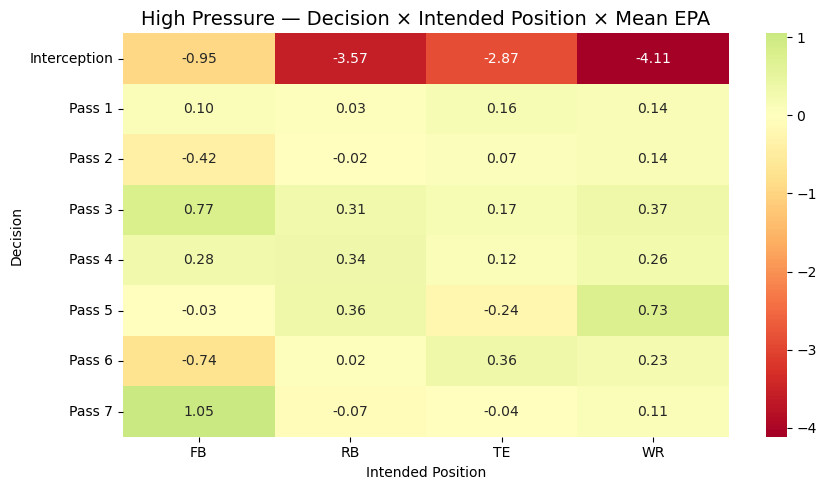

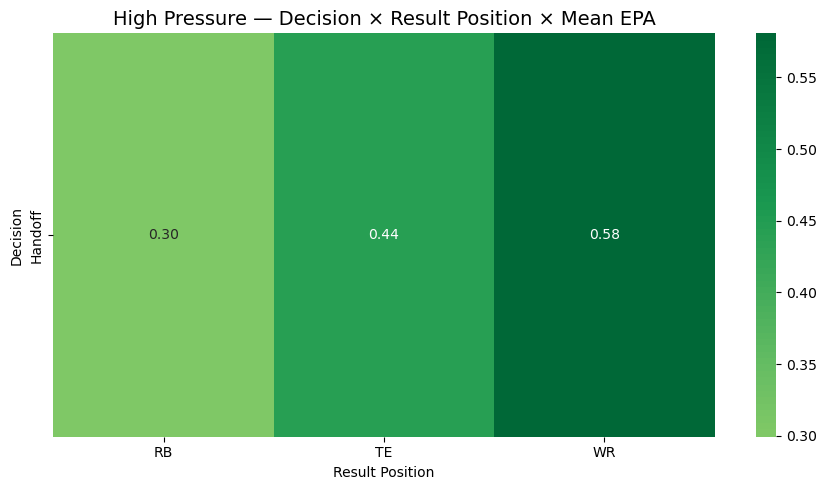

[Info] 使用样本阈值：30

=== High Pressure — Top 6 QBs by Mean EPA ===
   passer_player_name  count  mean_epa
37         M.Stafford     61 -0.009919
46      T.Bridgewater     93 -0.041382
32           K.Murray     71 -0.055241
17            J.Allen     74 -0.075157
39          P.Mahomes     97 -0.141717
25            J.Hurts     89 -0.190194

=== High Pressure — Bottom 5 QBs by Mean EPA ===
   passer_player_name  count  mean_epa
5    B.Roethlisberger     59 -0.788845
23             J.Goff    113 -0.809377
1          Aa.Rodgers     69 -0.832466
16            G.Smith     40 -0.895037
21           J.Fields     62 -1.043073


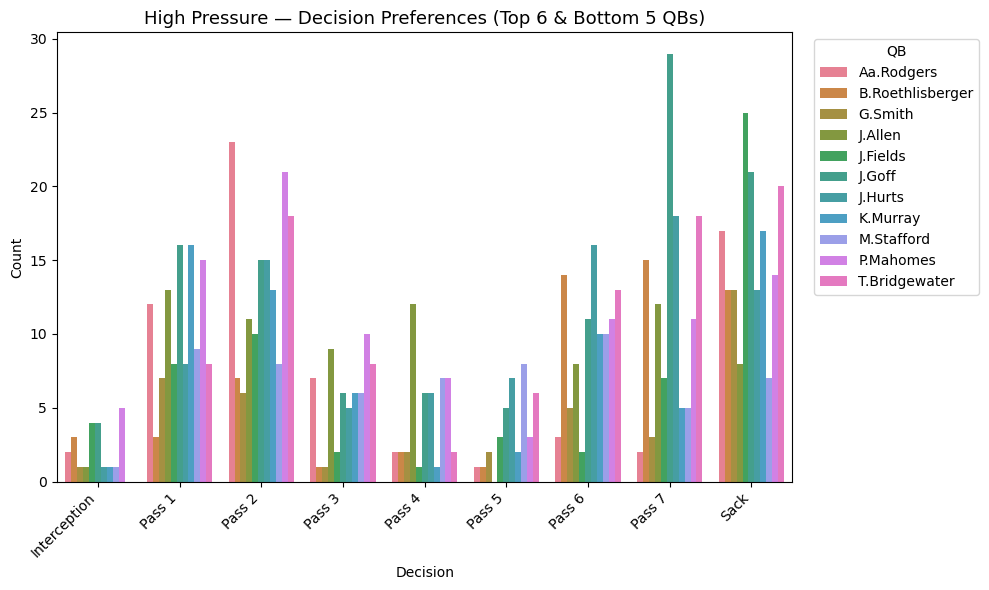

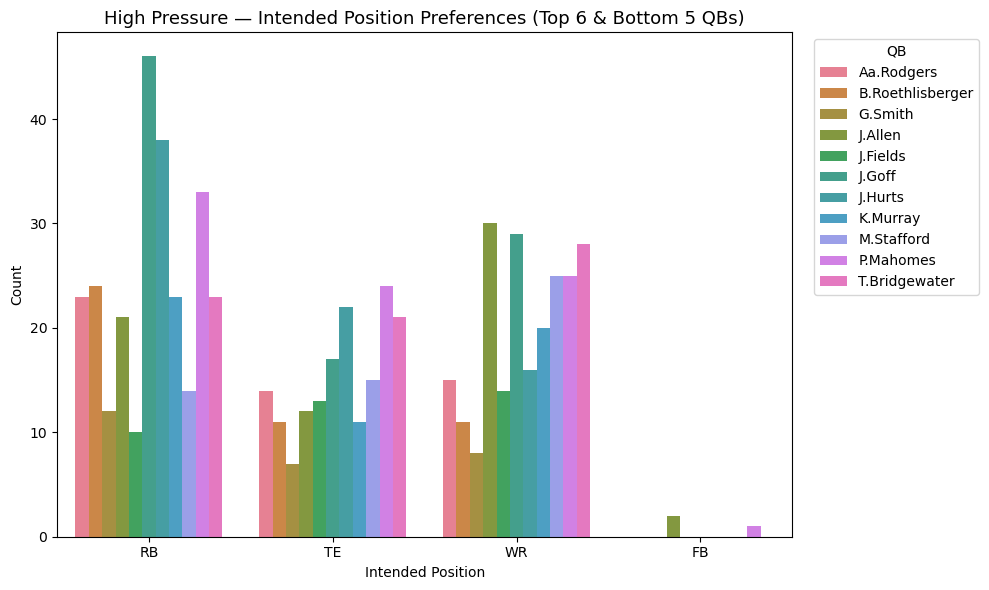

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== 1) Load Data =====================
# 首选含 decision_type/结果持球者 的数据；否则回退到 plays_with_targets_v5.csv
CANDIDATES = [
    "plays_with_roles_v2.csv",         # 如果你按我之前脚本生成了带 decision_type/result 的表
    "plays_with_roles_backfilled.csv", # 或回填过 qbId/positions 的表
    "plays_with_targets_v5.csv"        # 你当前可视化版本（至少有 throw_type/target_pos）
]
csv_path = next((p for p in CANDIDATES if Path(p).exists()), None)
if csv_path is None:
    raise FileNotFoundError("找不到输入CSV，请将数据命名为 plays_with_roles_v2.csv 或 plays_with_targets_v5.csv")
df = pd.read_csv(csv_path)
print(f"[Info] 使用数据文件：{csv_path}")

# 统一/兜底 EPA 列
if "epa" not in df.columns:
    for c in ["EPA","expectedPointsAdded","play_epa","epa_play","exp_pts_added"]:
        if c in df.columns:
            df["epa"] = pd.to_numeric(df[c], errors="coerce")
            break
if "epa" not in df.columns:
    # 尝试差分
    before_c = next((c for c in ["expectedPointsBefore","exp_pts_before"] if c in df.columns), None)
    after_c  = next((c for c in ["expectedPointsAfter","exp_pts_after"]   if c in df.columns), None)
    if before_c and after_c:
        df["epa"] = pd.to_numeric(df[after_c], errors="coerce") - pd.to_numeric(df[before_c], errors="coerce")
    else:
        raise ValueError("未找到 epa 列，也无法用 expectedPointsBefore/After 计算。")

# ===================== 2) Ensure/Map Columns =====================
required_base = {"under_pressure","epa"}
missing = required_base - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# 决策类型：优先 decision_type；没有就用 throw_type（1–7），其他视为缺失
if "decision_type" not in df.columns:
    if "throw_type" in df.columns:
        # 你的 throw_type 就是 1–7：直接沿用到 decision_type
        df["decision_type"] = pd.to_numeric(df["throw_type"], errors="coerce")
    else:
        df["decision_type"] = np.nan

# 决策标签（便于看图）
DECISION_LABELS = {
    1:"Pass 1", 2:"Pass 2", 3:"Pass 3", 4:"Pass 4",
    5:"Pass 5", 6:"Pass 6", 7:"Pass 7",
    80:"Handoff", 81:"QB Scramble", 82:"QB Designed Run",
    83:"Sack", 84:"QB Fumble", 85:"Interception",
    86:"Throwaway", 87:"Spike", 88:"Kneel", 89:"Penalty/No Play"
}
df["decision_label"] = df["decision_type"].map(DECISION_LABELS).fillna("Unknown")

# 位置简化函数（把 FB/HB/TB 合并到 RB）
def simplify_pos(p):
    if pd.isna(p): return None
    p = str(p).upper()
    if p in {"FS","SS"}: return "S"
    if p in {"MLB","ILB","OLB"}: return "LB"
    if p in {"HB","TB","FB"}: return "RB"
    if p in {"WR","TE","RB","QB","CB","S","LB","DB"}: return p
    return p

# 意图位置：优先 intended_receiver_pos_simple；否则从 target_pos 规范
if "intended_receiver_pos_simple" not in df.columns:
    if "target_pos" in df.columns:
        df["intended_receiver_pos_simple"] = df["target_pos"].map(simplify_pos)
    else:
        df["intended_receiver_pos_simple"] = np.nan

# 结果位置：优先 result_pos_simple；否则尝试 ballcarrier_pos_simple；仍无则为空（结果热力图可能跳过）
if "result_pos_simple" not in df.columns:
    if "ballcarrier_pos_simple" in df.columns:
        df["result_pos_simple"] = df["ballcarrier_pos_simple"].map(simplify_pos)
    else:
        df["result_pos_simple"] = np.nan

# QB 名称字段：兼容 passer_player_name / qb_name
QB_NAME_COL = "passer_player_name" if "passer_player_name" in df.columns else ("qb_name" if "qb_name" in df.columns else None)
if QB_NAME_COL is None:
    # 退化为ID
    QB_NAME_COL = "qbId" if "qbId" in df.columns else None

# ===================== 3) Filter High Pressure =====================
df_hp = df[df["under_pressure"] == 1].copy()
print(f"[Info] 高压样本：{len(df_hp)}，其中 epa 非空：{df_hp['epa'].notna().sum()}")

# ===================== 4) Heatmap: 决策 × 意图位置 × 平均EPA（仅传球/拦截） =====================
is_pass_like = df_hp["decision_type"].between(1,7) | (df_hp["decision_type"] == 85)
intent_df = (
    df_hp[is_pass_like & df_hp["intended_receiver_pos_simple"].notna() & df_hp["epa"].notna()]
    .groupby(["decision_label","intended_receiver_pos_simple"])["epa"]
    .mean().reset_index()
)
if not intent_df.empty:
    heat_intent = intent_df.pivot(index="decision_label", columns="intended_receiver_pos_simple", values="epa")
    plt.figure(figsize=(9, 5))
    sns.heatmap(heat_intent, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
    plt.title("High Pressure — Decision × Intended Position × Mean EPA", fontsize=14)
    plt.ylabel("Decision")
    plt.xlabel("Intended Position")
    plt.tight_layout()
    plt.show()
else:
    print("[Skip] 意图位置热力图：无可用样本")

# ===================== 5) Heatmap: 决策 × 结果位置 × 平均EPA（所有决策） =====================
result_df = (
    df_hp[df_hp["result_pos_simple"].notna() & df_hp["epa"].notna()]
    .groupby(["decision_label","result_pos_simple"])["epa"]
    .mean().reset_index()
)
if not result_df.empty:
    heat_result = result_df.pivot(index="decision_label", columns="result_pos_simple", values="epa")
    plt.figure(figsize=(9, 5))
    sns.heatmap(heat_result, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
    plt.title("High Pressure — Decision × Result Position × Mean EPA", fontsize=14)
    plt.ylabel("Decision")
    plt.xlabel("Result Position")
    plt.tight_layout()
    plt.show()
else:
    print("[Skip] 结果位置热力图：无可用样本（可能缺 result_pos_simple 列或为空）")

# ===================== 6) Top 6 / Bottom 5 QBs（自适应样本阈值） =====================
if QB_NAME_COL is None:
    print("[Skip] 找不到 QB 名/ID 列（passer_player_name / qb_name / qbId），跳过 QB 分组。")
else:
    # 只用有 epa 的
    tmp = df_hp[df_hp["epa"].notna()].copy()
    # 自适应阈值（确保能挑出一些QB）
    thresholds = [30, 25, 20, 15, 10, 5]
    chosen_t = None
    for t in thresholds:
        qb_epa = (
            tmp.groupby(QB_NAME_COL)
            .agg(count=("epa","size"), mean_epa=("epa","mean"))
            .reset_index()
        )
        qb_epa = qb_epa[qb_epa["count"] >= t]
        if len(qb_epa) >= 11:  # Top6 + Bottom5
            chosen_t = t
            break
    if chosen_t is None:
        # 回退：不设阈值，至少把前11个搞出来
        qb_epa = (
            tmp.groupby(QB_NAME_COL)
            .agg(count=("epa","size"), mean_epa=("epa","mean"))
            .reset_index()
            .sort_values("mean_epa", ascending=False)
        )
        print("[Warn] 无法满足阈值，回退为不设阈值挑选")
    else:
        qb_epa = qb_epa.sort_values("mean_epa", ascending=False)
        print(f"[Info] 使用样本阈值：{chosen_t}")

    top6_qbs = qb_epa.head(6)[QB_NAME_COL].tolist()
    bottom5_qbs = qb_epa.tail(5)[QB_NAME_COL].tolist()

    print("\n=== High Pressure — Top 6 QBs by Mean EPA ===")
    print(qb_epa.head(6)[[QB_NAME_COL,"count","mean_epa"]])
    print("\n=== High Pressure — Bottom 5 QBs by Mean EPA ===")
    print(qb_epa.tail(5)[[QB_NAME_COL,"count","mean_epa"]])

    # ===================== 7) 决策偏好（Top/Bottom） =====================
    sel_qbs = top6_qbs + bottom5_qbs
    # 决策偏好（次数）
    qb_dec_pref = (
        tmp[tmp[QB_NAME_COL].isin(sel_qbs)]
        .groupby([QB_NAME_COL, "decision_label"])
        .size()
        .reset_index(name="count")
    )
    if not qb_dec_pref.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=qb_dec_pref, x="decision_label", y="count", hue=QB_NAME_COL)
        plt.title("High Pressure — Decision Preferences (Top 6 & Bottom 5 QBs)", fontsize=13)
        plt.ylabel("Count")
        plt.xlabel("Decision")
        plt.xticks(rotation=45, ha="right")
        plt.legend(title="QB", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()
    else:
        print("[Skip] 决策偏好：无可用样本")

    # ===================== 8) 意图位置偏好（Top/Bottom） =====================
    # 只看传球/拦截，避免非传球的空意图
    pass_like_sel = tmp["decision_type"].between(1,7) | (tmp["decision_type"] == 85)
    qb_tgt_pref = (
        tmp[pass_like_sel & tmp[QB_NAME_COL].isin(sel_qbs) & tmp["intended_receiver_pos_simple"].notna()]
        .groupby([QB_NAME_COL, "intended_receiver_pos_simple"])
        .size()
        .reset_index(name="count")
    )
    if not qb_tgt_pref.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=qb_tgt_pref,
            x="intended_receiver_pos_simple", y="count", hue=QB_NAME_COL
        )
        plt.title("High Pressure — Intended Position Preferences (Top 6 & Bottom 5 QBs)", fontsize=13)
        plt.ylabel("Count")
        plt.xlabel("Intended Position")
        plt.legend(title="QB", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()
    else:
        print("[Skip] 意图位置偏好：无可用样本")